<a href="https://colab.research.google.com/github/Orsel1/AzubiGit/blob/master/A_LP1_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM QUEBEC - Tyokase Orseer

# LP1 

# Data Analysis Project - Indian Start-up Funding Analysis

# Context

Team Quebec was interested in knowing what type of startups are getting funded in the last few years? We also wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days? This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

# Content

In this project, team Quebec is going to analyse funding received by start-ups in India from 2018 to 2021..

Column names and description:

Company/Brand: Name of the company/start-up

Founded: Year start-up was founded

Sector: Sector of service

What it does: Description about Company

Founders: Founders of the Company

Investor: Investors

Amount($): Raised fund

Stage: Round of funding reached

# Methodology 

Our task is to develop a unique story from this dataset by stating and
testing a hypothesis, asking questions, perform analysis and share
insights with appropriate visualisations.

So as part of the project you are to:

-   Ask questions

-   Develop hypothesis

-   Process the data

-   Analyse the data

-   Visualise the data

-   Test our Hypothesis 

-  Merge and publish to PowerbI

# Research Questions

#### 1. What are the top sectors that receive the most funding?
#### 2. What is the distribution of funding amounts among start-ups?
#### 3. Which cities have the highest concentration of start-ups?
#### 4. How has the number of start-ups and funding amounts changed over time?
#### 5. How does the funding amount correlate with the start-up stage?




# **Hypothesis**

#### H0: Technology start-ups receive more funding than non-technology start-ups.
#### H1: There is no significant difference in funding amounts between technology start-ups and non-technology start-ups.

#### This project was done in google colab. If you are not working in google colab, skip to **Import the Libraries**. To begin there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install summarytools


# Import the Libraries

In [3]:
# Data handling
import numpy as np 
import pandas as pd 
import glob
from summarytools import dfSummary

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

# import plotly.express as px

from scipy import stats

from scipy.stats import pearsonr

from scipy.stats import chi2_contingency

# Other packages
import os
import re
#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer

# Load the data 


In [95]:
# For Google Colab

df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/startup_funding2018.csv')
df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/startup_funding2019.csv')
df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/startup_funding2020.csv')
df21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/startup_funding2021.csv')



# For Jupyter Notebook

#df18= pd.read_csv("C:/Users/NII/Documents/Azubi Africa/LP1/LP1/files/startup_funding2018.csv")
#df19= pd.read_csv("C:/Users/NII/Documents/Azubi Africa/LP1/LP1/files/startup_funding2019.csv")
#df20= pd.read_csv("C:/Users/NII/Documents/Azubi Africa/LP1/LP1/files/startup_funding2020.csv")
#df21= pd.read_csv("C:/Users/NII/Documents/Azubi Africa/LP1/LP1/files/startup_funding2021.csv")

# **Exploring the Data**

In [5]:
df18.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [6]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [7]:
df19.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [8]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [9]:
df20.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [10]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [11]:
df21.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [12]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [13]:
# Check the number of columns and rows of the dataframe
print(df18.shape)
print(df19.shape)
print(df20.shape)
print(df21.shape)

(526, 6)
(89, 9)
(1055, 10)
(1209, 9)


# **Data Cleaning**
1. Imputing/dropping missing values
2. Ensuring columns are in the appropriate data types
3. Dropping unecessary columns
4. Adding the year columns
5. Adding the investor column to df1 (2018)
6. Rename columns to ensure they have similar names
7. Joining (merge) the dataframes 


## First Dataframe (2018)

In [14]:
dfSummary(df18, is_collapsible= False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company Name[object],1. TheCollegeFever2. NIRAMAI Health Analytix3. Drivezy4. Hush - Speak Up. Make Work Bet5. The Souled Store6. Perspectico7. Kogta Financial India Limited8. Hospals9. UrbanClap10. Square Off11. other,2 (0.4%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)515 (97.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADlklEQVR4nO3cQWojZxRG0VdGOO1JCSHwEpI9eBG92F6EFpE9GOMaxJ2eVAadhJBx+hYo54w0/AcXngz6vOz7PlB4OPoB/H+IjYzYyIiNjNjIiI2M2MiIjYzYyCwz8zQzs+/7x8Fv4c6drtfr55mZZVm+CI4f6WFd18u6rpeZeTz6Mdw339nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxp27a3Pz9/O/Ql3D0bBDKLf5lFxXc2Mg/LsvyyLMunox/C/XuYmZ9n5qejH8L9c0bJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mg8zMyvM/P70Q/h/tkgkHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlMwyM08z83j0Q7hb3/Z9/5iZOV2v18/rul6OfhH3adu2t2VZvuz7/nFa1/Xy8vLycT6fvx79MO7L+/v7p9vtdnl9fX2cmY/TzMz5fP76/Pz828Fv4z49/fXBHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkTjPffwpy9EO4P//u6rRt29vtdrvMP34KAv+VbdveZubbjJ+F8+P9/bNw6yoy/kAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzBzYDflba1o3nAAAAAElFTkSuQmCC"">",0(0.0%)
2,Industry[object],"1. —2. Financial Services3. Education4. Information Technology5. Health Care, Hospital6. Finance, Financial Services7. Fitness, Health Care, Wellness8. Internet9. Artificial Intelligence10. Health Care11. other",30 (5.7%)15 (2.9%)8 (1.5%)7 (1.3%)5 (1.0%)5 (1.0%)4 (0.8%)4 (0.8%)4 (0.8%)4 (0.8%)440 (83.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEIElEQVR4nO3cQU4bZwCG4d/IovFmLMsSx+AAHILD9hA+APewLM8iUDZ0EagahRI11byk5Hm2WPJIvBrj0f+xenp6GlC4eO8L4NchNjJiIyM2MmIjIzYyYiMjNjJiI7MaY2zGGJffed3j09PTfXA9fGDr/X5/O03T7q0XzfN8Wq1WvwuO/2I9TdPu5ubmfrvdPrz2gvP5/OlwOOyOx+PlGENs/LD1GGNst9uHq6urz2+8bhNdDx+YLwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmPcaXM2v/9IK3fgb/xnqe59PhcNiNN86szfN8GmM8dpfFR2SDQGblX2ZRee3O5i7GIr5ZV1lSsZSv1lWWVCzptXWVJRWL8FCXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzFeDF+MWlvTN4MW4haU4Fk7G4IXM3+9s7mgs6q/Bi6ELS7uYpml3fX09nhdW3xsrww+7GGOMzWbzx3tfCB+fh7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkLsYY4/7+/rf3vhA+vot5nk93d3eGLizOsXAyBi9kfEEg42OUjHUVGesqMtZVZHxBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxj4WSsq8i83NmGuxpLW+/3+9sxxjB2YWkX0zTtjF0oeM5GRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZm/Tx0GcPYhYU5Fk7G4IWMOxsZgxcyBi9kPPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWRsEMhYV5FxZyNjXUXGuoqMRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsg4Fk7G4IWMOxsZgxcyBi9kPPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGsXAyBi9k/M1GxscoGesqMtZVZPzNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGPhZKyryLizkTF4IWPwQsajDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZBwLJ2PwQublzuZIOI9Lf7qt9/v97fMGgV/YPM+npUdP62madjc3N/fb7fZhqTfh53Y+nz8dDofd8Xi8HGMsF9sYY2y324erq6vPS70J/wubpd/AczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy6zG+HDF57wvh/VS///U8z6fD4bAbwRETfl7Pw6dFR0+OhfNi8WPhBi9kfEEgIzYyYiMjNjJiIyM2MmIjIzYyYiPzJysFcWnmc/wRAAAAAElFTkSuQmCC"">",0(0.0%)
3,Round/Series[object],1. Seed2. Series A3. Angel4. Venture - Series Unknown5. Series B6. Series C7. Debt Financing8. Private Equity9. Corporate Round10. Pre-Seed11. other,280

In [15]:
df18 =  df18.drop("About Company", axis = 1)
df18.set_axis(['Company', 'Sector', 'Stage','Amount($)', 'City'], axis = 'columns', inplace = True )
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    526 non-null    object
 1   Sector     526 non-null    object
 2   Stage      526 non-null    object
 3   Amount($)  526 non-null    object
 4   City       526 non-null    object
dtypes: object(5)
memory usage: 20.7+ KB


<ipython-input-15-6aa7b510a869>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df18.set_axis(['Company', 'Sector', 'Stage','Amount($)', 'City'], axis = 'columns', inplace = True )


### Cleaning the Company Column

In [63]:
df18['Company'].unique()

array(['Happy Cow Dairy', 'MyLoanCare', 'PayMe India', 'Eunimart',
       'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech', 'Ideal Insurance Brokers', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
       'MissMalini Entertainment', 'Rooter', '

In [64]:
df18["Company"]= df18["Company"].replace("Ideal Insurance Brokers/ 121Policy.com", "Ideal Insurance Brokers")
df18["Company"]= df18["Company"].replace("HousingMan.com", "HousingMan")
df18["Company"]= df18["Company"].replace("edureka!","Edureka")
df18["Company"]= df18["Company"].replace("Nivesh.com","Nivesh")
df18["Company"]= df18["Company"].replace("Orbo.ai","Orbo")
df18["Company"]= df18["Company"].replace("Locus.sh","Locus")
df18["Company"]= df18["Company"].replace("Kuvera.in","Kuvera")
df18["Company"]= df18["Company"].replace("Buddy4Study.com", "Buddy4Study")
df18["Company"]= df18["Company"].replace("arzooo.com","arzooo")

### Cleaning the Sector column

In [65]:
df18['Sector'].unique()

array(['Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transportation',
       'Financial Services', 'Food and Beverage', 'Autonomous Vehicles

In [66]:
df18['Sector'].nunique()

405

In [67]:
df18['Sector'] = df18['Sector'].str.replace('—', 'Unknown')
df18["Sector"] = df18["Sector"].str.split(',').str[0]

In [68]:
df18['Sector'].unique()

array(['Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mobile',
       'Adve

In [69]:
df18['Sector'].nunique()

148

In [70]:
#rename similar sectors with wrong or different spelling to make it consistent
df18.replace({'Sector':{'E-Commerce Platforms':'E-Commerce','Autonomous Vehicles':'Automotive','eSports':'Sports',
                           'Funding Platform':'Crowdfunding','Crowdsourcing':'Crowdfunding','Last Mile Transportation':'Transportation',
                           'Delivery':'Logistics','Delivery Service':'Logistics','Children':'Child Care','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Basketball':'Sports','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food Delivery':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Online Games':'Gaming','—':'Unknown','Finance':'Financial Services','Brand Marketing':'Advertising'}}, inplace=True)
print(df18['Sector'].nunique())
print(df18['Sector'].unique())

72
['Agriculture' 'Credit Cards' 'Financial Services' 'E-Commerce'
 'Cloud Computing' 'IT' 'Market Research' 'Mobile Payments' 'Apps'
 'Catering' 'Manufacturing' 'Automotive' 'Accounting' 'AI' 'IoT'
 'Aerospace' 'ERP' 'Logistics' 'Insurance' 'Blockchain' 'Education'
 'Energy' 'Transportation' 'Fitness' 'Hospitality'
 'Media and Entertainment' 'EdTech' 'Healthcare' 'Unknown' 'Sports'
 'Analytics' 'Trading Platform' 'Consumer Goods' 'Fashion' 'Consulting'
 'Biotechnology' 'Environmental Consulting' 'Consumer Applications'
 'Mobile Phones' 'Advertising' 'Home Decor' 'Creative Agency'
 'Embedded Systems' 'Cosmetics' 'AgTech' 'Software' 'Digital Media'
 'Crowdfunding' 'Classifieds' 'Music Streaming' 'Government' 'Child Care'
 'Facilities Support Services' 'Finance' 'Veterinary'
 'Business Development' 'Human Resources' 'Customer Service'
 'Dietary Supplements' 'Nanotechnology' 'File Sharing' 'Real Estate'
 'Fraud Detection' 'Cryptocurrency' 'CleanTech' 'Biopharma' 'Gaming'
 'Search Engine' 

In [71]:
df18['Sector'].info()

<class 'pandas.core.series.Series'>
Int64Index: 525 entries, 1 to 525
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
525 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


### Cleaning the Stage Column

In [72]:
df18['Stage'].nunique()


21

In [73]:
df18['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [74]:
df18.replace({'Stage':{'Pre-Seed':'Seed','Private Equity':'Seed','Venture - Series Unknown':"Undisclosed",'Series A':'Series',
                       'Series B':'Series','Series H':'Series','Series C':'Series','Series E':'Series','Series D':'Series',
                           'Debt Financing':'Debt','Post-IPO Debt':'Debt','Corporate Round':'Seed','Undisclosed':'Seed',
                           'Post-IPO Equity':'Seed','Non-equity Assistance':'Seed','Funding Round':'Seed',
                            'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':"Unknown",'Grant':'Seed','Unknown':'Seed'}},inplace=True)
print(df18['Stage'].nunique())
print(df18['Stage'].unique())

7
['Seed' 'Series' 'Angel' 'Undisclosed' 'Debt' 'Unknown' 'Secondary Market']


### Cleaning the Amount Column

In [75]:
print(df18["Amount($)"].nunique())
print(df18["Amount($)"].unique())

179
[6.020000e+05 9.782500e+05 2.000000e+06 1.300000e+06 1.600000e+06
 2.408000e+05 7.525000e+05 1.505000e+06 1.500000e+05 1.100000e+06
 7.525000e+03 6.000000e+06 6.500000e+05 5.267500e+05 9.632000e+05
 3.010000e+05 1.000000e+06 5.000000e+06 4.000000e+06 4.515000e+05
 2.800000e+06 1.700000e+06 7.525000e+04 1.881250e+05 2.257500e+05
 5.000000e+05 1.565200e+06 6.772500e+05 1.340000e+07 3.762500e+05
 3.973200e+05 1.204000e+05 9.030000e+02 9.000000e+06 1.000000e+05
 2.000000e+04 2.500000e+05 1.200000e+05 5.117000e+05 5.147100e+06
 1.431450e+05 9.030000e+06 7.420000e+08 1.505000e+07 3.010000e+07
 3.980000e+06 1.000000e+04 1.505000e+03 3.762500e+06 1.000000e+09
 7.000000e+06 3.500000e+07 8.277500e+06 2.850000e+07 3.612000e+06
 1.806000e+06 2.400000e+06 3.000000e+07 3.762500e+07 2.300000e+07
 1.100000e+07 6.622000e+05 3.240000e+06 9.030000e+05 5.400000e+08
 9.782500e+06 2.408000e+07 9.000000e+05 1.000000e+07 1.500000e+06
 1.053500e+06 1.400000e+07 1.542625e+06 1.000000e+08 1.806000e+04
 7.826

A number of the data points have  currencies in ₹ (rupees) and others in $ (dollars), 
the rupees are changed to dollars based on the average exchange rate  for 2018 which one rupee equal 0.01505 dollars.


In [81]:
#rupees_index = df18.index[df18['Amount($)'].str.contains('₹')]
# removing or stripping all special characters form the amount column
df18['Amount($)']=df18['Amount($)'].replace('—', np.nan)    # replacing '-' in the amount column with 0
df18['Amount($)']=df18['Amount($)'].apply(lambda x: str(x).replace("₹" ,""))   # replacing '₹' in the amount column with nothing
df18['Amount($)']=df18['Amount($)'].apply(lambda x: str(x).replace("$" ,""))   # replacing '$' in the amount column with nothing
df18['Amount($)']=df18['Amount($)'].apply(lambda x: str(x).replace("," ,""))   # replacing ',' in the amount column with nothing
df18['Amount($)']=pd.to_numeric(df18['Amount($)'], errors='coerce') 
df18.loc[rupees_index,['Amount($)']]=df18.loc[rupees_index,['Amount($)']].values*0.01505
df18['Amount($)']=df18['Amount($)'].fillna(df18['Amount($)'].median())

print(df18["Amount($)"].nunique())
print(df18["Amount($)"].unique())
df18["Amount($)"].info()

179
[9.06010000e+03 1.47226625e+04 2.00000000e+06 1.30000000e+06
 1.60000000e+06 3.62404000e+03 1.13251250e+04 2.26502500e+04
 1.50000000e+05 1.10000000e+06 1.13251250e+02 6.00000000e+06
 6.50000000e+05 7.92758750e+03 1.44961600e+04 4.53005000e+03
 1.00000000e+06 5.00000000e+06 4.00000000e+06 6.79507500e+03
 2.80000000e+06 1.70000000e+06 1.13251250e+03 2.83128125e+03
 3.39753750e+03 5.00000000e+05 2.35562600e+04 1.01926125e+04
 1.34000000e+07 5.66256250e+03 5.97966600e+03 1.81202000e+03
 1.35901500e+01 9.00000000e+06 1.00000000e+05 2.00000000e+04
 2.50000000e+05 1.20000000e+05 7.70108500e+03 7.74638550e+04
 1.43145000e+05 1.35901500e+05 7.42000000e+08 2.26502500e+05
 4.53005000e+05 3.98000000e+06 1.00000000e+04 2.26502500e+01
 5.66256250e+04 1.00000000e+09 7.00000000e+06 3.50000000e+07
 1.24576375e+05 2.85000000e+07 5.43606000e+04 2.71803000e+04
 2.40000000e+06 3.00000000e+07 5.66256250e+05 2.30000000e+07
 1.10000000e+07 9.96611000e+03 3.24000000e+06 1.35901500e+04
 5.40000000e+08 1.47

### Cleaning the City Column

In [82]:
print(df18['City'].nunique())
print(df18['City'].unique())

47
['Mumbai' 'Gurgaon' 'Noida' 'Hyderabad' 'Bangalore' 'Kalkaji' 'Delhi'
 'New Delhi' 'Hubli' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Belgaum' 'Thane' 'Margão' 'Indore' 'Alwar' 'Kannur'
 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh' 'Andheri'
 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam' 'Bhopal'
 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow']


In [55]:
# there are city names, states, and country
# We need to remove the Name of the States, and Country, to do so we use:
df18["City"] = df18["City"].str.split(',').str[0]

# Now we can look to ensure consistency in city names
df18["City"]= df18["City"].replace("Bengaluru","Bangalore")
df18["City"]= df18["City"].replace("Bangalore City","Bangalore")
df18["City"]= df18["City"].replace("India",'New Delhi')
print(df18['City'].nunique())
print(df18['City'].unique())
df18["City"].info()

47
['Mumbai' 'Gurgaon' 'Noida' 'Hyderabad' 'Bangalore' 'Kalkaji' 'Delhi'
 'New Delhi' 'Hubli' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Belgaum' 'Thane' 'Margão' 'Indore' 'Alwar' 'Kannur'
 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh' 'Andheri'
 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam' 'Bhopal'
 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow']
<class 'pandas.core.series.Series'>
Int64Index: 525 entries, 1 to 525
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
525 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [83]:
# identifying and correcting duplicated values in the dataset
df18[df18.duplicated()]

,Company,Sector,Stage,Amount($),City,Year,Investor


In [84]:
df18[df18["Company"]=="TheCollegeFever"]
df18 = df18.drop_duplicates(subset = None, keep = "last")
df18.duplicated().any()

False

In [85]:
# Now we can add the year column in order to determine level of investment over time
df18["Year"] = 2018
df18["Investor"] = 'Unknown'
df18.head(5)

,Company,Sector,Stage,Amount($),City,Year,Investor
1,Happy Cow Dairy,Agriculture,Seed,9.060100e+03,Mumbai,2018,Unknown
2,MyLoanCare,Credit Cards,Series,1.472266e+04,Gurgaon,2018,Unknown
3,PayMe India,Financial Services,Angel,2.000000e+06,Noida,2018,Unknown
4,Eunimart,E-Commerce,Seed,1.300000e+06,Hyderabad,2018,Unknown
5,Hasura,Cloud Computing,Seed,1.600000e+06,Bangalore,2018,Unknown


In [86]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 1 to 525
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    525 non-null    object 
 1   Sector     525 non-null    object 
 2   Stage      525 non-null    object 
 3   Amount($)  525 non-null    float64
 4   City       525 non-null    object 
 5   Year       525 non-null    int64  
 6   Investor   525 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.8+ KB


In [87]:
df18.to_csv('df18.csv')

## Second Dataframe (2019)

In [99]:
dfSummary(df19, is_collapsible= False)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company/Brand[object],1. Kratikal2. Licious3. Bombay Shaving4. KredX5. Euler Motors6. PiBeam7. Stanza Living8. Ecom Express9. WishADish10. Origo11. other,2 (2.2%)2 (2.2%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)77 (86.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD2ElEQVR4nO3cMWorVwCG0SshnKdmhDB4GV7ALCKLzSK0AO/DGE0ROa9RihjjJgSC9ClWzulUWEzxMWKG+3t1Pp8HFNa3vgD+P8RGRmxkxEZGbGTERkZsZMRGRmxkVmOM7Rjj4ePzz/P5fLrh9XDHNo+Pj79O07QfY4xlWd5Wq9VvguMa1tM07ed5Ps3zfPqI7uEf/wr+hc0YY+x2u/ePz9sbXgt3zgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2YwxxvF4/HHrC+H+bZZleTscDp8ndccYP298TdwpGwQyK/8yi4o7GxnrKjLWVWSsq8h4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQ+Xpnc1fjqj4HL8YuXNt6mqb98/PzMHbh2tZjjLHdbv+49YVw/7zUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7MeY4zT6fTLrS+E+7deluXt5eXF2IWrcyycjMELGQ8IZPyMkrGuImNdRca6iowHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4Fk7GuoqMOxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kHFnI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjI2CGSsq8i4s5GxriJjXUXGuoqMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGXc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjAYGMn1Ey1lVkrKvIWFeR8YBARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGcfCyVhXkXFnI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcyX+9s8NXFf+k+By+X/FK+v2sMoDbTNO3neT7tdrv3S30p39vxePxxOBz2r6+vD2OMy8U2xhi73e796enp90t9KXdhe+kv9FKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzGaMv46U3PpC+O+4Vg+bZVneDofDflzhSAnf1zUGUI6F83cufizc4IWMBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJ/AiE/vT2Ddz0lAAAAAElFTkSuQmCC"">",0(0.0%)
2,Founded[float64],Mean (sd) : 2014.5 (2.9)min < med < max:2004.0 < 2015.0 < 2019.0IQR (CV) : 3.2 (685.9),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjklEQVR4nO3dz4raUBSA8XONSvxDgkh156bLQhdZ+hB92D5CFz6Bi25m5U4QiZhOMN6kq5YpnarJTRpP+H77mDB8CNcznJiiKAR4dr22HwB4RL/tB8CfjDEjERk6fMSlKIrXup7nWRDqEzHGjObz+ZcgCGZVP+N0Oh2NMV+7FiuhPpdhEASz9Xr9GoZhWvbiOI79zWYzOxwOQxEhVDQrDMN0sVj8qHj5qNaHeRIcpqACoUIFQoUKhAoVCBUqECpU4OepjrHWDkQkMMZUubwnIrnD7RubihFqhyRJMsiy7PNqtfI8zys1MLDWDpIk+TidTl96vV5W5f5NTsUItUMul0vf9/1xFEXpcrk8lrl2t9vNttvthyiKvpe9VqT5qRihdtBkMik92Toej6Oq177R2FSMwxRUIFSoQKhQgVChAqFCBU79qI3jsOHmsIBQUQuXYYPI/WEBoaIWLsOGR4YFhIpaOQwMbg4LOExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWY9f+D4+bnTm59bhOhvsN183NXtz63iVDfV3nzc5e3PreJUG9w2Pzcya3PbeIwBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBf4ftQEOm5eDPM8HDTySeoRaM5fNy1mW+dbaT2mafhORqi8l6yRCrVkNr3kcX69Xr6nn04pQG+Lymkf8jcMUVCBUqECoUIFQoQKhQoW7p/42dzCx/wm/3Ay1zR1M7H/CW/e+UdvcwcT+J/z20A/+be5gYv8TRDhMQYmHvlHjOPbLfnAcx761ti/V398e5Hne13bv8/nsi4gkSeLv9/vx/7pW870f+Tv/BMwSUi2UpD5hAAAAAElFTkSuQmCC"">",29(32.6%)
3,HeadQuarter[object],1. Bangalore2. nan3. Mumbai4. Delhi5. Noida6. Gurugram7. Chennai8. Pune9. Jaipur10. Telangana11. other,21 (23.6%)19 (21.3%)12 (13.5%)10 (11.2%)5 (5.6%)5 (5.6%)4 (4.5%)2 (2.2%)2 (2.2%)1 (1.1%)8 (9.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEc0lEQVR4nO3dTU7cWABG0QdCdJgUQpFYRhbAInqxvYhaQPaBEDUI6UzoQQdEfkhVgX1dgnNmDCJ5cPVKtvzFR/f39wMKx0tfAO+H2MiIjYzYyIiNjNjIiI2M2MiIjczRGONsjHG69IX85Nv9/f3d0hfBtE4+fvz492q1ulj6Qp7abDY3R0dH/wjubTlZrVYXV1dXd+fn51+Xvpgxxri9vf2wXq8vrq+vT8cYYntDTsYY4/z8/Ovl5eWXpS/mibOlL4DpuUEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyJ2P8/w7Z0hfy4JCuhWmdbDabm/V6fTEO6B2yzWZzM8b4tvR1MC0bBDJH/sssKodysjnJ3oGDWFdZU70Pi6+rrKnej0NZVx3MnTDz8VCXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOKDFwOX9

In [101]:
# We can start cleaning the data by dropping columnns that are irrelevant to the project
df19.drop("Founded", axis = 1, inplace = True)
df19.drop("What it does", axis = 1, inplace = True)
df19.drop("Founders", axis = 1, inplace = True)
df19.head(5)

,Company/Brand,HeadQuarter,Sector,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [102]:
# Now we can proceed to rename the columns
df19 = df19.rename(columns= {"Company/Brand":"Company", "HeadQuarter": "City" })
df19.head(5)

,Company,City,Sector,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Cleaning Company Column

In [103]:
print(df19['Company'].nunique())
print(df19['Company'].unique())
df19['Company'].info()

87
['Bombay Shaving' 'Ruangguru' 'Eduisfun' 'HomeLane' 'Nu Genes' 'FlytBase'
 'Finly' 'Kratikal' 'Quantiphi' 'Lenskart' 'Cub McPaws' 'Appnomic'
 'Kaleidofin' 'JobSquare' 'Open Secret' 'LivFin' "Byju's" 'Zest Money'
 'Witblox' 'Azah Personal Care Pvt. Ltd.' 'SalaryFits' 'Pristyn Care'
 'Springboard' 'DROR Labs Pvt. Ltd' 'Medlife' 'Seekify' 'Toffee Insurance'
 'Fireflies .ai' 'HungerBox' 'Bijak' 'Licious' 'truMe' 'Pumpkart'
 'Asteria Aerospace' 'Rivigo' 'HappyEasyGo' 'Zetwerk' 'Observe.AI'
 'Freshokartz' 'Lil’ Goodness and sCool meal' 'Trell' 'VMate'
 'Bombay Shirt Company' 'Slintel' 'MyGameMate' 'Afinoz' 'Rein Games'
 'Ecozen' 'Box8' 'Awign Enterprises' 'Purplle' 'Freightwalla' 'TapChief'
 'eJOHRI' 'Ninjacart' 'Binca Games' 'KredX' 'm.Paani' 'Origo' 'WishADish'
 'Ecom Express' 'Stanza Living' 'PiBeam' 'Euler Motors' 'Moms Co'
 'Cubical Labs' 'Lawyered' 'Cuemath' 'Nivesh.com' 'Zebu' 'Smart Institute'
 'CarDekho' 'Shadowfax' 'Credr' 'Sportido' 'Phable' 'Sarva' 'IndyFint'
 'Zolostays' 'Ola

In [104]:
# we need to clean these company names Fireflies .ai (Fireflies AI), Nivesh.com (Nivesh)
df19["Company"]= df19["Company"].replace("Fireflies .ai", "Fireflies AI")
df19["Company"]= df19["Company"].replace("Nivesh.com", "Nivesh")
df19['Company'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Company
Non-Null Count  Dtype 
--------------  ----- 
89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


Cleaning City Column

In [105]:
print(df19['City'].nunique())
print(df19['City'].unique())
df19['City'].info()

17
[nan 'Mumbai' 'Chennai' 'Telangana' 'Pune' 'Bangalore' 'Noida' 'Delhi'
 'Ahmedabad' 'Gurugram' 'Haryana' 'Chandigarh' 'Jaipur' 'New Delhi'
 'Surat' 'Uttar pradesh' 'Hyderabad' 'Rajasthan']
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
70 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


In [106]:
# The only cleaning we need to do in this section on fill the NaN values with 'Unknown'
df19['City'] = df19['City'].fillna('Unknown')
df19['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


### Cleaning Sector Column

In [107]:
print(df19['Sector'].nunique())
print(df19['Sector'].unique())
df19['Sector'].info()

52
['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' nan 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
84 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


In [108]:
#rename similar sectors with wrong or different spelling to make it consistent
df19.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming'}}, inplace=True)
print(df19['Sector'].nunique())
print(df19['Sector'].unique())

33
['E-Commerce' 'EdTech' 'Home Decor' 'AgTech' 'IT' 'SaaS' 'AI' 'FinTech'
 'Human Resources' 'Catering' 'Health' 'Healthcare' 'Cybersecurity'
 'Insurance' 'Food' 'IoT' 'Logistics' 'Transportation' 'Manufacturing'
 'Digital Media' nan 'Sports' 'Cosmetics' 'Fashion' 'Gaming' 'Real Estate'
 'Automotive tech' 'Legal' 'Finance' 'Automotive' 'Fitness'
 'Financial Services' 'Customer Service' 'Hospitality']


In [109]:
# all nan values are to be filled with unknown on the 
df19['Sector']=df19['Sector'].fillna('Unknown')
df19['Sector'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


### Cleaning Company Investor

In [110]:
print(df19['Investor'].nunique())
print(df19['Investor'].unique())
df19['Investor'].info()

86
['Sixth Sense Ventures' 'General Atlantic'
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey'
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs'
 'Innovation in Food and Agriculture (IFA)' 'Undisclosed'
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.'
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.'
 'Multiples Alternate Asset Management' 'SoftBank' 'Venture Catalysts'
 'Avataar Ventures' 'Oikocredit' 'Titan Capital' 'Matrix Partners'
 'German development finance institution DEG'
 'South Africa’s Naspers Ventures, the CPP Investment Board'
 'Goldman Sachs.' 'Mumbai Angels Network' 'Kunal Bahl, Rohit Bansal.'
 'Brazilian VC Fund Confrapar'
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.'
 'Reach Capital' 'Inflection Point Ventures'
 'Wilson Global Opportunities Fund' 'Sequoia Capita' 'IVM Intersurer'
 'Canaan Partners' 'Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.'
 'Omnivor

In [111]:
df19["Investor"] = df19["Investor"].str.split(',').str[0]
print(df19['Investor'].nunique())
print(df19['Investor'].unique())
df19['Investor'].info()

83
['Sixth Sense Ventures' 'General Atlantic' 'Deepak Parekh'
 'Evolvence India Fund (EIF)' 'Innovation in Food and Agriculture (IFA)'
 'Undisclosed' 'Social Capital' 'Gilda VC'
 'Multiples Alternate Asset Management' 'SoftBank' 'Venture Catalysts'
 'Avataar Ventures' 'Oikocredit' 'Titan Capital' 'Matrix Partners'
 'German development finance institution DEG'
 'South Africa’s Naspers Ventures' 'Goldman Sachs.'
 'Mumbai Angels Network' 'Kunal Bahl' 'Brazilian VC Fund Confrapar'
 'Sequoia India' 'Reach Capital' 'Inflection Point Ventures'
 'Wilson Global Opportunities Fund' 'Sequoia Capita' 'IVM Intersurer'
 'Canaan Partners' 'Paytm' 'Omnivore and Omidyar Network India'
 'Vertex Growth Fund' 'Rajan Kaistha' 'Dinesh Dua' 'Reliance Industries'
 'SAIF Partners India VI Ltd' 'Korea Investment Partners (KIP)'
 'Lightspeed and Greenoaks Capital' 'Scale Venture Partners' 'ThinkLab'
 'Sajan Pillai' 'Ruizheng Investment' 'Alibaba' 'Lightbox Ventures'
 'Stellaris Ventures' 'Jindagi Live Angels' 'F

### Cleaning the Amount($) Column

In [112]:
print(df19['Amount($)'].nunique())
print(df19['Amount($)'].unique())
df19['Amount($)'].info()

50
['$6,300,000' '$150,000,000' '$28,000,000' '$30,000,000' '$6,000,000'
 'Undisclosed' '$1,000,000' '$20,000,000' '$275,000,000' '$22,000,000'
 '$5,000,000' '$140,500' '$540,000,000' '$15,000,000' '$182,700'
 '$12,000,000' '$11,000,000' '$15,500,000' '$1,500,000' '$5,500,000'
 '$2,500,000' '$140,000' '$230,000,000' '$49,400,000' '$32,000,000'
 '$26,000,000' '$150,000' '$400,000' '$2,000,000' '$100,000,000'
 '$8,000,000' '$100,000' '$50,000,000' '$120,000,000' '$4,000,000'
 '$6,800,000' '$36,000,000' '$5,700,000' '$25,000,000' '$600,000'
 '$70,000,000' '$60,000,000' '$220,000' '$2,800,000' '$2,100,000'
 '$7,000,000' '$311,000,000' '$4,800,000' '$693,000,000' '$33,000,000']
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Amount($)
Non-Null Count  Dtype 
--------------  ----- 
89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


In [113]:
# stripping off special characters
df19["Amount($)"]=df19['Amount($)'].apply(lambda x: str(x).replace("$" ,"")) 
df19["Amount($)"]=df19['Amount($)'].apply(lambda x: str(x).replace("," ,""))
df19["Amount($)"]=df19['Amount($)'].replace("Undisclosed" ,0)

# change the data type to a float
df19['Amount($)'] = pd.to_numeric(df19['Amount($)'], errors='coerce', downcast='float')     

# all nan values are to be filled with zero on the 
df19['Amount($)']=df19['Amount($)'].fillna(df19['Amount($)'].median())

In [114]:
print(df19['Amount($)'].nunique())
print(df19['Amount($)'].unique())
df19['Amount($)'].info()

50
[6.300e+06 1.500e+08 2.800e+07 3.000e+07 6.000e+06 0.000e+00 1.000e+06
 2.000e+07 2.750e+08 2.200e+07 5.000e+06 1.405e+05 5.400e+08 1.500e+07
 1.827e+05 1.200e+07 1.100e+07 1.550e+07 1.500e+06 5.500e+06 2.500e+06
 1.400e+05 2.300e+08 4.940e+07 3.200e+07 2.600e+07 1.500e+05 4.000e+05
 2.000e+06 1.000e+08 8.000e+06 1.000e+05 5.000e+07 1.200e+08 4.000e+06
 6.800e+06 3.600e+07 5.700e+06 2.500e+07 6.000e+05 7.000e+07 6.000e+07
 2.200e+05 2.800e+06 2.100e+06 7.000e+06 3.110e+08 4.800e+06 6.930e+08
 3.300e+07]
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Amount($)
Non-Null Count  Dtype  
--------------  -----  
89 non-null     float32
dtypes: float32(1)
memory usage: 484.0 bytes


### Cleaning the Stage Column

In [115]:
print(df19['Stage'].nunique())
print(df19['Stage'].unique())
df19['Stage'].info()

15
[nan 'Series C' 'Fresh funding' 'Series D' 'Pre series A' 'Series A'
 'Series G' 'Series B' 'Post series A' 'Seed funding' 'Seed fund'
 'Series E' 'Series F' 'Series B+' 'Seed round' 'Pre-series A']
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Stage
Non-Null Count  Dtype 
--------------  ----- 
43 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


In [116]:
# replacing wrongly spelt and similar enteries to promote consistency
df19.replace({'Stage':{'Seed fund':'Seed','Post series A':'Pre-Series','Series C':'Series','Series D':'Series',
                       'Series A':'Series','Series G':'Series','Series B':'Series','Series E':'Series','Series F':'Series',
                           'Pre series A':'Pre-Series','Series B+':'Series','Fresh funding':'Seed',
                           'Pre-series A':'Pre-Series','Seed round':'Seed','Seed funding':'Seed','Grant':'Debt'}},inplace=True)
df19['Stage']=df19['Stage'].fillna('Unknown')

In [117]:
print(df19['Stage'].nunique())
print(df19['Stage'].unique())
df19['Stage'].info()

4
['Unknown' 'Series' 'Seed' 'Pre-Series']
<class 'pandas.core.series.Series'>
RangeIndex: 89 entries, 0 to 88
Series name: Stage
Non-Null Count  Dtype 
--------------  ----- 
89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


In [118]:
# Now we can check for duplicates within the 2019 df
df19.duplicated().any()

False

In [119]:
# Now we can add the year column
df19["Year"] = 2019
df19.head(10)

,Company,City,Sector,Investor,Amount($),Stage,Year
0,Bombay Shaving,Unknown,E-Commerce,Sixth Sense Ventures,6300000.0,Unknown,2019
1,Ruangguru,Mumbai,EdTech,General Atlantic,150000000.0,Series,2019
2,Eduisfun,Mumbai,EdTech,Deepak Parekh,28000000.0,Seed,2019
3,HomeLane,Chennai,Home Decor,Evolvence India Fund (EIF),30000000.0,Series,2019
4,Nu Genes,Telangana,AgTech,Innovation in Food and Agriculture (IFA),6000000.0,Unknown,2019
5,FlytBase,Pune,IT,Undisclosed,0.0,Unknown,2019
6,Finly,Bangalore,SaaS,Social Capital,0.0,Unknown,2019
7,Kratikal,Noida,IT,Gilda VC,1000000.0,Pre-Series,2019
8,Quantiphi,Unknown,AI,Multiples Alternate Asset Management,20000000.0,Series,2019
9,Lenskart,Delhi,E-Commerce,SoftBank,275000000.0,Series,2019


In [120]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    89 non-null     object 
 1   City       89 non-null     object 
 2   Sector     89 non-null     object 
 3   Investor   89 non-null     object 
 4   Amount($)  89 non-null     float32
 5   Stage      89 non-null     object 
 6   Year       89 non-null     int64  
dtypes: float32(1), int64(1), object(5)
memory usage: 4.6+ KB


In [121]:
df19 = df19.to_csv('df19.csv')

## Third Dataframe(2020)

In [122]:
dfSummary(df20, is_collapsible= False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company/Brand[object],1. Nykaa2. Zomato3. Rebel Foods4. Servify5. Vedantu6. MPL7. Sarva8. LetsTransport9. Plum10. BankBazaar11. other,"6 (0.6%)6 (0.6%)4 (0.4%)4 (0.4%)4 (0.4%)3 (0.3%)3 (0.3%)3 (0.3%)3 (0.3%)3 (0.3%)1,016 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpElEQVR4nO3cMW4bVxhG0X8EQrGaIQgCWkKyBy3Ci/UiuIjsQRA0ReSoYYqkieAYcOE7AHNOJbB6xQUfScyn5Xq9DhTu9j4A/x9iIyM2MmIjIzYyYiMjNjJiIyM2MsvMPMzMXK/Xt53Pwo07nM/nzzMzy7J8ERw/0926rqd1XU8zc7/3YbhtPrORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDtm0v//z9vutJuHk2CGQW/zKLinc2MtZVZKyryPjpg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGY+FkzF4IeOdjYzBCxmDFzJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsZj4WQMXsj4zEbGNUrGuoqMdRUZn9nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5HxWDgZ6yoy3tnIGLyQMXgh46cPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kPBZOxuCFjM9sZO6WZfltWZZPex+E23c3M7/OzC97H4Tb5xolIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJ3M/P7zPy590G4fQYvZFyjZMRGxrqKjHUVGdcoGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kXKNkxEbG4IWMwQsZ1ygZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2Rco2TERkZsZKyryFhXkXGNkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxjVKRmxkDF7IGLyQcY2SERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGNUpmmZmHmbnf+yDclPfr9fr28cXD+Xz+vK7raY8TcZu2bXtZluXLx+AO67qenp6e3o7H49e9DsfteH19/XS5XE7Pz8/3M/Pv2GZmjsfj18fHxz92OR236OFbL/qCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/djIXsfhNvwvZYO27a9XC6X0/zHYyHwo7Zte5mZ94+veyycn+Gbj4VbV5HxBYGM2MiIjYzYyIiNjNjIiI2M2MiIjcxf2C6/HvgTNaQAAAAASUVORK5CYII="">",0(0.0%)
2,Founded[object],1. nan2. 20153. 20184. 20195. 20166. 20177. 20148. 20209. 201210. 201311. other,212 (20.1%)136 (12.9%)123 (11.7%)104 (9.9%)103 (9.8%)92 (8.7%)72 (6.8%)42 (4.0%)40 (3.8%)36 (3.4%)95 (9.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEH0lEQVR4nO3dPW7bWABG0aeBEUwaCYYBL8aLmMXOIrQbw7CKJEijKaaM/khRl4XP2QBTXDyDxPuizfF4HFD4a+1/AF+H2MiIjYzYyIiNjNjIiI2M2MiIjcxmjPF9jPFtpef/Ph6PP1d6NrGnl5eXf7bb7fMaDz8cDh+bzeZfwX0NT9vt9vnt7e3nbrf7VT748/Pz7/1+//z+/v5tjCG2L+BpjDF2u92v19fXHys8//sKz2QlXhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M0xj/3y2rH7zGM1nX0+Fw+Njv989jhbtlh8PhY4zxu34u67BBILPxX2ZRecTJ5rTipMXXVRZTnLPouspiiksesa6ymOIkH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjILDp4MWLhksUHL0YsnONaOBmDFzJLnmxONC5abPBi6MI1iwxeDF24xZKDF0MXLvJRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcwigxdDF26x2ODF0IVrXAsnY/BCxgsCmXv/jPrTyc3uWldZVDHF7HWVRRVT3buusqjiZl4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyMxeV1lUMdVd6yqLKqZwLZyMdRUZJxsZgxcyBi9kDF7I+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdfCyRi8kLnnZHOqMcnswYuxC1PNGrwYuzDHPYMXYxcm8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIzFpXWVYxx+x1lWUVU9kgkLGuIjP1ZHOaMdukdZVFFfe4eV1lUcW9pq6rLKqYzUddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MjcPXoxcuNekwYuRC/dwLZyMwQuZSyebU4xFnR28GLewtJODF+MWHuHS4MW4hUX5qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm5ODFuIVHODt4MW5haa6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyroWTsa4ic+5kc6qxuJODF2MXHuGPwYuxC49ybvBi7MLifNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj88fgxdiFRzk5eDF24RFcCydj8ELm0pTvGqcfk5z9hZdrjGKY6uQvvFxjFMMcl37h5RqjGCbxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MyV94ucYohjnO/sLLNUYxTOVaOBmDFzJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyPwHsPJO4tjkA7sAAAAASUVORK5CYII="">",212(20.1%)
3,HeadQuarter[object],1. Bangalore2. Mumbai3. nan4. Gurugram5. Delhi6. Chennai7. New Delhi8. Pune9. Noida10. Hyderabad11. other,317 (30.0%)165 (15.6%)94 (8.9%)79 (7.5%)62 (5.9%)43 (4.1%)36 (3.4%)36 (3.4%)32 (3.0%)25 (2.4%)166 (15.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIH

In [123]:
# We drop the columns that are irrelevant to the EDA
df20.drop("Founded", axis = 1, inplace = True)
df20.drop("What it does", axis = 1, inplace = True)
df20.drop("Founders", axis = 1, inplace = True)
df20.drop("Unnamed: 9", axis = 1, inplace = True)

In [124]:
# Next we rename the columns to ensure consistency in column names
df20 = df20.rename(columns= {"Company/Brand":"Company", "HeadQuarter": "City" })
df20.head(5)

,Company,City,Sector,Investor,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,Angel investors,"$200,000",NaN
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,Pune,Hygiene management,Venture Center,Undisclosed,Pre-seed
3,NCOME,New Delhi,Escrow,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,Indore,AgriTech,"Siana Capital Management, Info Edge","$340,000",NaN


### Cleaning Company Column

In [125]:
print(df20['Company'].nunique())
print(df20['Company'].unique())
df20['Company'].info()

905
['Aqgromalin' 'Krayonnz' 'PadCare Labs' 'NCOME' 'Gramophone' 'qZense'
 'MyClassboard' 'Metvy' 'Rupeek' 'Gig India' 'Slurrp Farm' 'Medfin'
 'MasterG' 'Brila 91' 'FoodyBuddy' 'Zomato' 'OurEye.ai' 'Shiprocket'
 'Pine Labs' 'Moneyboxx Finance' 'EWar' 'SucSEED Indovation'
 'TaxBuddy.com' 'Awign Enterprises' 'Circle of Angels' 'CoinDCX' 'Glance'
 'VerSe Innovation' 'Voosh' 'Delhivery' 'Arya' 'Pickrr' 'PhonePe'
 'Countingwell' 'Callify.ai' 'Hudle' 'Cover it Up' 'BiteSpeed' 'WakeFit'
 'Sreyas Holistic Remedies' 'Fleeca India' 'M1xchange' 'Exotel'
 'PagarBook' 'PointOne Capital' 'Ayana' 'Fisdom' 'Tinker Coders'
 'Infinite Uptime' 'HappyLocate' 'Loop Health' 'NeoDocs' 'The ePlane'
 'TagMango' 'The New Shop' 'MobiKwik' 'DebugsBunny' 'BHIVE Investech'
 'Rivigo' 'ZipLoan' 'Swipez' 'Humus' 'Artivatic.ai' 'Prescinto' 'Toppeq'
 'Bolo Indya' 'Bombay Play' 'FreshToHome' 'KIKO TV'
 'Atomberg Technologies' 'DealShare' 'Smallcase' 'CueMath' 'Gamerji'
 '5C Network' 'Ethereum Push Notification Service' '

In [126]:
df20["Company"]= df20["Company"].replace("OurEye.ai", "OurEye AI")
df20["Company"]= df20["Company"].replace("TaxBuddy.com", "TaxBuddy")
df20["Company"]= df20["Company"].replace("Callify.ai", "Callify AI")
df20["Company"]= df20["Company"].replace("Tamasha.live", "Tamasha")
df20["Company"]= df20["Company"].replace("Univ.ai", "Univ AI")

In [127]:
print(df20['Company'].nunique())
print(df20['Company'].unique())
df20['Company'].info()

905
['Aqgromalin' 'Krayonnz' 'PadCare Labs' 'NCOME' 'Gramophone' 'qZense'
 'MyClassboard' 'Metvy' 'Rupeek' 'Gig India' 'Slurrp Farm' 'Medfin'
 'MasterG' 'Brila 91' 'FoodyBuddy' 'Zomato' 'OurEye AI' 'Shiprocket'
 'Pine Labs' 'Moneyboxx Finance' 'EWar' 'SucSEED Indovation' 'TaxBuddy'
 'Awign Enterprises' 'Circle of Angels' 'CoinDCX' 'Glance'
 'VerSe Innovation' 'Voosh' 'Delhivery' 'Arya' 'Pickrr' 'PhonePe'
 'Countingwell' 'Callify AI' 'Hudle' 'Cover it Up' 'BiteSpeed' 'WakeFit'
 'Sreyas Holistic Remedies' 'Fleeca India' 'M1xchange' 'Exotel'
 'PagarBook' 'PointOne Capital' 'Ayana' 'Fisdom' 'Tinker Coders'
 'Infinite Uptime' 'HappyLocate' 'Loop Health' 'NeoDocs' 'The ePlane'
 'TagMango' 'The New Shop' 'MobiKwik' 'DebugsBunny' 'BHIVE Investech'
 'Rivigo' 'ZipLoan' 'Swipez' 'Humus' 'Artivatic.ai' 'Prescinto' 'Toppeq'
 'Bolo Indya' 'Bombay Play' 'FreshToHome' 'KIKO TV'
 'Atomberg Technologies' 'DealShare' 'Smallcase' 'CueMath' 'Gamerji'
 '5C Network' 'Ethereum Push Notification Service' 'Mihu

### Cleaning the City Column

In [128]:
print(df20['City'].nunique())
print(df20['City'].unique())
df20['City'].info()

77
['Chennai' 'Bangalore' 'Pune' 'New Delhi' 'Indore' 'Hyderabad' 'Gurgaon'
 'Belgaum' 'Noida' 'Mumbai' 'Andheri' 'Jaipur' 'Ahmedabad' 'Kolkata'
 'Tirunelveli, Tamilnadu' 'Thane' nan 'Singapore' 'Gurugram' 'Gujarat'
 'Haryana' 'Kerala' 'Jodhpur' 'Jaipur, Rajastan' 'Delhi'
 'Frisco, Texas, United States' 'California' 'Dhingsara, Haryana'
 'New York, United States' 'Patna'
 'San Francisco, California, United States' 'San Francisco, United States'
 'San Ramon, California' 'Paris, Ile-de-France, France'
 'Plano, Texas, United States' 'Sydney'
 'San Francisco Bay Area, Silicon Valley, West Coast' 'Bangaldesh'
 'London, England, United Kingdom' 'Sydney, New South Wales, Australia'
 'Milano, Lombardia, Italy' 'Palmwoods, Queensland, Australia' 'France'
 'San Francisco Bay Area, West Coast, Western US'
 'Trivandrum, Kerala, India' 'Cochin' 'Samastipur, Bihar'
 'Irvine, California, United States' 'Tumkur, Karnataka'
 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom'
 'Shanghai, China' 

In [129]:
#strip and select only the City name, which is the first part and ignore the country 
df20['City']=df20['City'].str.split(',').str[0]


df20["City"]= df20["City"].replace("San Francisco Bay Area","San Francisco")
df20["City"]= df20["City"].replace("Tamil Nadu","Chennai")
df20["City"]= df20["City"].replace("San Franciscao","San Francisco")
df20["City"]= df20["City"].replace("Bengaluru","Bangalore")
df20["City"]= df20["City"].replace("Banglore","Bangalore")
df20["City"]= df20["City"].replace('Bangaldesh','Bangladesh')
df20["City"]= df20["City"].replace("Newcastle Upon Tyne","Newcastle")
df20["City"]= df20["City"].replace("France","Paris")
df20["City"] = df20["City"].fillna('Unknown')    

In [130]:
print(df20['City'].nunique())
print(df20['City'].unique())
df20['City'].info()

66
['Chennai' 'Bangalore' 'Pune' 'New Delhi' 'Indore' 'Hyderabad' 'Gurgaon'
 'Belgaum' 'Noida' 'Mumbai' 'Andheri' 'Jaipur' 'Ahmedabad' 'Kolkata'
 'Tirunelveli' 'Thane' 'Unknown' 'Singapore' 'Gurugram' 'Gujarat'
 'Haryana' 'Kerala' 'Jodhpur' 'Delhi' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'Bangladesh' 'London' 'Milano' 'Palmwoods' 'Trivandrum' 'Cochin'
 'Samastipur' 'Irvine' 'Tumkur' 'Newcastle' 'Shanghai' 'Jiaxing'
 'Rajastan' 'Kochi' 'Ludhiana' 'Dehradun' 'Tangerang' 'Berlin' 'Seattle'
 'Riyadh' 'Seoul' 'Bangkok' 'Kanpur' 'Chandigarh' 'Warangal' 'Hyderebad'
 'Odisha' 'Bihar' 'Goa' 'Uttar Pradesh' 'Bhopal' 'Coimbatore']
<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
1055 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


### Cleaning the Sector Column

In [131]:
print(df20['Sector'].nunique())
print(df20['Sector'].unique())
df20['Sector'].info()

302
['AgriTech' 'EdTech' 'Hygiene management' 'Escrow' 'Networking platform'
 'FinTech' 'Crowdsourcing' 'Food & Bevarages' 'HealthTech'
 'Fashion startup' 'Food Industry' 'Food Delivery'
 'Virtual auditing startup' 'E-commerce' 'Gaming' 'Work fulfillment'
 'AI startup' 'Telecommunication' 'Logistics' 'Tech Startup' 'Sports'
 'Retail' 'Medtech' 'Tyre management' 'Cloud company' 'Software company'
 'Venture capitalist' 'Renewable player' 'IoT startup' 'SaaS startup'
 'Aero company' 'Marketing company' 'Retail startup' 'Co-working Startup'
 'Finance company' 'Tech company' 'Solar Monitoring Company'
 'Video sharing platform' 'Gaming startup' 'Video streaming platform'
 'Consumer appliances' 'Blockchain startup' 'Conversational AI platform'
 'Real Estate' 'SaaS platform' 'AI platform' 'Fusion beverages' 'HR Tech'
 'Job portal' 'Hospitality' 'Digital Media' 'Dairy startup'
 'Content management' 'Spacetech' 'Transportation' 'Trading platform'
 'AI Company' 'Photonics startup' 'Entertainment'

In [132]:
#rename similar sectors with wrong or different spelling to make it consistent
df20.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',"Fashion startup":'Fashion',
                             'Deisgning':'Creative Agency','Pharmacy':'Healthcare','Consultancy':'Creative Agency','Tech hub':'IT','E-connect':'Digital Media',
                             'B2B Agritech':'AgTech','Food diet':'Healthcare','Preschool Daycare':'Child Care','AI Robotics':'AI','SaaS/Edtech':'Saas',
                             'Transport & Rentals':'Transportation','Transport Automation':'Transportation','Neo-banking':'Financial Services',
                             'Ad-tech':'Advertising','E-mobility':'Mobile Payment','E tailor':'E-Commerce','Estore':'E-Commerce','Housing & Rentals':'Real Estate',
                             'AI & Deep learning':'AI','Sales & Services':'Business Development','VR & SaaS':'Saas','Hygiene':'CleanTech','Cleantech':'CleanTech',
                             'Visual Media':'Media and Entertainment','Content Marktplace':'Advertising','Machine Learning':'AI','AI & Media':'AI',
                             'E-tail':'E-Commerce','Automotive and Rentals':'Automotive','ravel tech':'Transportation','AI & Data science':'AI',
                             'Finance company':'Finance','Tech company':'IT','Solar Monitoring Company':'Energy','Video sharing platform':'Media and Entertainment',
                             'Gaming startup':'Gaming','Video streaming platform':'Media and Entertainment','Consumer appliances':'Consumer Goods',
                             'Blockchain startup':'Blockchain','Conversational AI platform':'AI','SaaS platform':'Saas','AI platform':'AI',
                             'Escrow':'Legal','Networking platform':'IT','Spacetech':'Aerospace','Trading platform':'E-Commerce','AI Company':'AI',
                             'Photonics startup':'Media and Entertainment','Entertainment':'Media and Entertainment','Scanning app':'Apps',
                             'Skincare startup':'Cosmetics','Food and Beverages':'Catering','FoodTech':'Catering','Biotechnology company':'Environmental Consulting',
                             'Proptech':'Facilities Support Services','Fitness startup':'Fitness','PaaS startup':'Saas','Beverages':'Catering',
                             'Automobiles':'Automotive','Deeptech':'AI','EV startup':'Environmental Consulting','AR/VR startup':'IT','Recruitment startup':'Human Resources',
                             'Tourism & EV':'Hospitality','QSR startup':'Customer Service','Video platform':'Media and Entertainment',
                             'Fusion beverages':'Catering','Job portal':'Human Resources','Dairy startup':'Catering','Content management':'Creative Agency',
                             'Work fulfillment':'Human Resources','HR Tech':'Human Resources','Software Company':'Software','Soil-Tech':'Agriculture',
                             'Travel & SaaS':'Transportation','Hygiene management':'CleanTech','Food & Bevarages':'Catering','Food Delivery':'Catering',
                             'Virtual auditing startup':'FinTech','HealthTech':'Healthcare','AI startup':'AI','Tech Startup':'IT','Medtech':'Healthcare',
                             'Tyre management':'Automotive','Cloud company':'Cloud Computing','Software company':'Software','Venture capitalist':'Finance',
                             'Renewable player':'Energy','IoT startup':'IoT','SaaS startup':'Saas','Aero company':'Aerospace','Marketing company':'Advertising',
                             'Retail startup':'Business Development','Co-working Startup':'Human Resources','—':'Unknown','Brand Marketing':'Advertising',
                             'Fertility tech':'Healthcare','Luxury car startup':'Automotive','FM':'Media and Entertainment','Food':'Catering',
                             'Nutrition sector':'Healthcare','Tech platform':'IT','Video':'Media and Entertainment','Retail Tech':'Business Development',
                             'HeathTech':'Healthcare','Sles and marketing':'Advertising','LegalTech':'Legal','Car Service':'Automotive',
                             'Bike marketplace':'Automotive','Agri tech':'AgTech','Reatil startup':'Business Development','AR platform':'IT',
                             'Content marketplace':'Creative Agency','Interior Design':'Home Decor','Home Design':'Home Decor','InsureTech':'Insurance',
                             'Rental space':'Facilities Support Services','Ayurveda tech':'IT','Packaging solution startup':'Logistics',
                             'Sanitation solutions':'CleanTech','HealthCare':'Healthcare','AI Startup':'AI','Solar solution':'Energy','Tech':'IT',
                             'Jewellery startup':'Fashion','Multinational conglomerate company':'Business Development','Deeptech startup':'AI',
                             'Social Network':'Digital Media','Publication':'Creative Agency','Venture capital':'Finance','Entreprenurship':'Business Development',
                             'E-market':'E-Commerce','Media & Networking':'Media and Entertainment','Automation tech':'Automotive','eMobility':'Mobile Payment',
                             'Food devlivery':'Catering','Warehouse':'Facilities Support Services','Online financial service':'FinTech',
                             'Eyeglasses':'Healthcare','Battery design':'Energy','Online credit management startup':'FinTech','Beverage':'Catering',
                             'TravelTech':'Transportation','Startup laboratory':'Business Development','Personal care startup':'Fitness',
                             'Customer service company':'Customer Service','SaaS\xa0\xa0startup':'Saas','Marketing startup':'Advertising',
                             'Service industry':'Human Resources','Social media':'Digital Media','R startup':'IT','HR Tech startup':'Human Resources',
                             'AR startup':'IT','Automotive Startup':'Automotive','Food Startup':'Catering','EdTech Startup':'Education',
                             'Car Trade':'Automotive','EdtTech':'Education','AI Platform':'AI','Automation':'Automotive','Solar SaaS':'Saas',
                             'WL & RAC protection':'Environmental Consulting','Social commerce':'E-Commerce','Home interior services':'Home Decor',
                             'Agritech startup':'AgTech','API platform':'Software','Deep Tech':'AI','Electricity':'Energy','Automotive company':'Automotive',
                             'FMCG':'Legal','Insurance Tech':'Insurance','Video personalization':'Media and Entertainment','Biomaterial startup':'Manufacturing',
                             'Health':'Healthcare','Craft Beer':'Creative Agency','Investment':'Finance','Linguistic Spiritual':'Education',
                             'Battery manufacturer':'Energy','Nano Distribution Network':'IT','AI health':'AI','Dating app':'Dating',
                             'Media':'Media and Entertainment','Healthcare/Edtech':'Healthcare','Social Commerce':'E-Commerce','Agritech/Commerce':'AgTech',
                             'Mobility tech':'Mobile Phones','Social e-commerce':'E-Commerce','Food & Logistics':'Logistics','SpaceTech':'Aerospace',
                             'Nutrition Tech':'Healthcare','HR':'Human Resources','nan':'Unknown','Agritech':'AgTech','AR/VR':'IT',
                             'Appliance':'Consumer Goods','Mental Health':'Healthcare','Solar Solution':'Energy','Saas':'SaaS','B2B marketplace':'E-Commerce',
                             'Fashion Tech':'Fashion','Nutrition tech':'Healthcare','Health & Wellness':'Fitness','Cloud Kitchen':'Cloud Computing',
                             'IoT/Automobile':'IoT','Eye Wear':'Healthcare','Digital tech':'IT','Data Intelligence':'ERP','Co-living':'Human Resources',
                             'Food & Beverages':'Catering','Defense tech':'Cybersecurity','Construction tech':'Construction','Nutrition':'Healthcare',
                             'Coworking':'Human Resources','Micro-mobiity':'Mobile Phones','Auto-tech':'Automotive','Robotics':'AI','Logitech':'IT',
                             'Med Tech':'Healthcare','Life sciences':'Healthcare','Retail Aggregator':'Business Development','Deep Tech AI':'AI',
                             'Biotech':'Environmental Consulting','HrTech':'Human Resources','AI & Debt':'AI','Transport':'Transportation',
                             'Co-working':'Human Resources','Insurtech':'Insurance','Automotive tech':'Automotive','EV':'Environmental Consulting',
                             'Supply chain, Agritech':'Logistics','Pharma':'Healthcare','Foodtech & Logistics':'Logistics','Housing':'Real Estate',
                             'Data Analytics':'ERP','Investment Tech':'Finance','Biopharma':'Healthcare','Dairy':'Catering','Beauty & wellness':'Fitness',
                             'Media Tech':'Media and Entertainment','E store':'E-Commerce','Data Science':'ERP','Travel tech':'Transportation',
                             'Techonology':'IT','Taxation':'Accounting','Automobile Technology':'Automotive','Food Industry':'Catering','Financial Services':'Financial Services',
                             'Interior & decor':'Home Decor','Health and Fitness':'Fitness','Location Analytics':'ERP','Mobility/Transport':'Transportation',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming'}}, inplace=True)
df20['Sector'] = df20['Sector'].fillna('Unknown')  
print(df20['Sector'].nunique())
print(df20['Sector'].unique())
df20['Sector'].info()

58
['AgTech' 'EdTech' 'CleanTech' 'Legal' 'IT' 'FinTech' 'Crowdsourcing'
 'Catering' 'Healthcare' 'Fashion' 'E-Commerce' 'Gaming' 'Human Resources'
 'AI' 'Telecommunication' 'Logistics' 'Sports' 'Business Development'
 'Automotive' 'Cloud Computing' 'Software' 'Finance' 'Energy' 'IoT' 'Saas'
 'Aerospace' 'Advertising' 'Media and Entertainment' 'Consumer Goods'
 'Blockchain' 'Real Estate' 'Hospitality' 'Digital Media'
 'Creative Agency' 'Transportation' 'Cosmetics' 'Apps'
 'Environmental Consulting' 'Facilities Support Services' 'Fitness'
 'Customer Service' 'Home Decor' 'Agriculture' 'Insurance' 'Education'
 'Manufacturing' 'Construction' 'Dating' 'Mobile Phones' 'Unknown' 'SaaS'
 'ERP' 'Cybersecurity' 'Cryptocurrency' 'Financial Services'
 'Mobile Payment' 'Child Care' 'Accounting']
<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
1055 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


### Cleaning the Investor Column

In [133]:
print(df20['Investor'].nunique())
print(df20['Investor'].unique())
df20['Investor'].info()

848
['Angel investors' 'GSF Accelerator' 'Venture Center'
 'Venture Catalysts, PointOne Capital'
 'Siana Capital Management, Info Edge'
 'Venture Catalysts, 9Unicorns Accelerator Fund' 'ICICI Bank.'
 'HostelFund' 'KB Investment, Bertelsmann India Investments'
 'Shantanu Deshpande, Subramaniam Ramadorai' 'Fireside Ventures'
 'Axilor Ventures, S.D. Shibulal' "Acumen Fund's angel programme"
 'Sequoia Capital India, Sixth Sense Ventures' 'Rebel Foods'
 'Kora, Tiger Global Management' '100X VC, Amara Ventures'
 'Bertelsmann India Investments, InnoVen Capital'
 'Mastercard, Temasek Holdings' 'BlackSoil, Caspian'
 'Jindal Steels, Jeet Banerjee' nan 'Zenith Global'
 'Unitus Ventures, Work10M' 'Coinbase Ventures, Polychain'
 'Mithril Capital Management.' 'Google' 'Better Capital'
 'Steadview Capital, Canada Pension Plan Investment Board' 'Quona Capital'
 'Swastika' 'Flipkart, Walmart' 'Delhi Private School, UAE, Interstar'
 'Malpani Ventures' 'Survam Partners' 'Whiteboard Capital'
 'Sequoia Cap

In [134]:
df20["Investor"] = df20["Investor"].fillna('Unknown')
df20["Investor"] = df20["Investor"].str.split(',').str[0]

In [135]:
print(df20['Investor'].nunique())
print(df20['Investor'].unique())
df20['Investor'].info()

687
['Angel investors' 'GSF Accelerator' 'Venture Center' 'Venture Catalysts'
 'Siana Capital Management' 'ICICI Bank.' 'HostelFund' 'KB Investment'
 'Shantanu Deshpande' 'Fireside Ventures' 'Axilor Ventures'
 "Acumen Fund's angel programme" 'Sequoia Capital India' 'Rebel Foods'
 'Kora' '100X VC' 'Bertelsmann India Investments' 'Mastercard' 'BlackSoil'
 'Jindal Steels' 'Unknown' 'Zenith Global' 'Unitus Ventures'
 'Coinbase Ventures' 'Mithril Capital Management.' 'Google'
 'Better Capital' 'Steadview Capital' 'Quona Capital' 'Swastika'
 'Flipkart' 'Delhi Private School' 'Malpani Ventures' 'Survam Partners'
 'Whiteboard Capital' 'Sequoia Capital.' 'Blacksoil' 'Bridgestone India'
 'BEENEXT' 'A91 Partners' 'Sequoia Capital' 'NIIF Ltd'
 'PayU Finance India' 'STEMROBO Technologies'
 'Infrastructure Leasing & Financial Services Limited'
 'The CoWrks Foundry' 'Y Combinator' '9Unicorns Accelerator Fund'
 'Speciale Invest' 'XRM Media' 'Huddle Accelerator'
 'Hindustan Media Venture' 'India Angel 

### Cleaning the Amount Column

In [136]:
print(df20['Amount($)'].nunique())
print(df20['Amount($)'].unique())
df20['Amount($)'].info()

309
['$200,000' '$100,000' 'Undisclosed' '$400,000' '$340,000' '$600,000'
 '$45,000,000' '$1,000,000' '$2,000,000' '$1,200,000' '$660,000,000'
 '$120,000' '$7,500,000' '$5,000,000' '$500,000' '$3,000,000'
 '$10,000,000' '$145,000,000' '$100,000,000' nan '$21,000,000'
 '$4,000,000' '$20,000,000' '$560,000' '$275,000' '$4,500,000'
 '$15,000,000' '$390,000,000' '$7,000,000' '$5,100,000' '$700,000,000'
 '$2,300,000' '$700,000' '$19,000,000' '$9,000,000' '$40,000,000'
 '$750,000' '$1,500,000' '$7,800,000' '$50,000,000' '$80,000,000'
 '$30,000,000' '$1,700,000' '$2,500,000' '$40,000' '$33,000,000'
 '$35,000,000' '$300,000' '$25,000,000' '$3,500,000' '$200,000,000'
 '$6,000,000' '$1,300,000' '$4,100,000' '$575,000' '$800,000'
 '$28,000,000' '$18,000,000' '$3,200,000' '$900,000' '$250,000'
 '$4,700,000' '$75,000,000' '$8,000,000' '$121,000,000' '$55,000,000'
 '$3,300,000' '$11,000,000' '$16,000,000' '$5,400,000' '$150,000,000'
 '$4,200,000' '$22,000,000' '$52,000,000' '$1,100,000' '$118,000,00

In [137]:
#first we address the rows with multiple entries
df20["Amount($)"]= df20["Amount($)"].replace("$887,000, $23,000,000", "$23,887,000")
df20["Amount($)"]= df20["Amount($)"].replace("$800,000,000 to $850,000,000", "$825,000,000")

In [138]:
# we replace the undisclosed values with 0
df20["Amount($)"] = df20["Amount($)"].replace("Undisclosed", 0)
df20["Amount($)"] = df20["Amount($)"].replace("Undiclsosed", 0)
df20["Amount($)"] = df20["Amount($)"].replace("Undislosed", 0)
df20["Amount($)"] = df20["Amount($)"].fillna(0)

In [139]:
#We remove the $ and , from the data
df20["Amount($)"] = df20["Amount($)"].str.strip("$")
df20["Amount($)"] = df20["Amount($)"].str.replace(",","")

In [140]:
# change the data type to a float
# The downcast parameter is used to set the data type to float
df20['Amount($)'] = pd.to_numeric(df20['Amount($)'], errors='coerce', downcast='float') 

In [141]:
# Replacing nan values with zero
df20['Amount($)']=df20['Amount($)'].fillna(df20['Amount($)'].median())

In [142]:
print(df20['Amount($)'].nunique())
print(df20['Amount($)'].unique())
df20['Amount($)'].info()

305
[2.0000000e+05 1.0000000e+05 3.0000000e+06 4.0000000e+05 3.4000000e+05
 6.0000000e+05 4.5000000e+07 1.0000000e+06 2.0000000e+06 1.2000000e+06
 6.6000000e+08 1.2000000e+05 7.5000000e+06 5.0000000e+06 5.0000000e+05
 1.0000000e+07 1.4500000e+08 1.0000000e+08 2.1000000e+07 4.0000000e+06
 2.0000000e+07 5.6000000e+05 2.7500000e+05 4.5000000e+06 1.5000000e+07
 3.9000000e+08 7.0000000e+06 5.1000000e+06 7.0000000e+08 2.3000000e+06
 7.0000000e+05 1.9000000e+07 9.0000000e+06 4.0000000e+07 7.5000000e+05
 1.5000000e+06 7.8000000e+06 5.0000000e+07 8.0000000e+07 3.0000000e+07
 1.7000000e+06 2.5000000e+06 4.0000000e+04 3.3000000e+07 3.5000000e+07
 3.0000000e+05 2.5000000e+07 3.5000000e+06 2.0000000e+08 6.0000000e+06
 1.3000000e+06 4.1000000e+06 5.7500000e+05 8.0000000e+05 2.8000000e+07
 1.8000000e+07 3.2000000e+06 9.0000000e+05 2.5000000e+05 4.7000000e+06
 7.5000000e+07 8.0000000e+06 1.2100000e+08 5.5000000e+07 3.3000000e+06
 1.1000000e+07 1.6000000e+07 5.4000000e+06 1.5000000e+08 4.2000000e+06
 2

## Cleaning the Stage Column

In [143]:
print(df20['Stage'].nunique())
print(df20['Stage'].unique())
df20['Stage'].info()

42
[nan 'Pre-seed' 'Seed' 'Pre-series A' 'Pre-series' 'Series C' 'Series A'
 'Series B' 'Debt' 'Pre-series C' 'Pre-series B' 'Series E' 'Bridge'
 'Series D' 'Series B2' 'Series F' 'Pre- series A' 'Edge' 'Series H'
 'Pre-Series B' 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-Seed'
 'Seed round' 'Pre-seed Round' 'Seed Round & Series A' 'Pre Series A'
 'Pre seed Round' 'Angel Round' 'Pre series A1' 'Series E2' 'Pre series A'
 'Seed Round' 'Bridge Round' 'Pre seed round' 'Pre series B'
 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series' 'Series C, D'
 'Seed funding']
<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: Stage
Non-Null Count  Dtype 
--------------  ----- 
591 non-null    object
dtypes: object(1)
memory usage: 8.4+ KB


In [144]:
df20.replace({'Stage':{'Pre-Seed':'Seed','Pre-series':'Seed','Series A-1':'Series','Seed Funding':'Seed',
                       'Series A':'Series','Series B':'Series','Series C':'Series','Series D':'Series','Series E':'Series',
                       'Series F':'Series','Series H':'Series','Pre-Series A':'Pre-Series','Pre-series A':'Pre-Series',
                       'Pre-Series B':'Pre-Series','Pre-series C':'Pre-Series','Pre-Series C':'Pre-Series',
                       'Seed round':'Seed','Pre-seed Round':'Seed','Pre seed Round':'Seed','Seed Round & Series A':'Series',
                       'Pre Series A':'Pre-Series','Angel Round':'Seed','Pre series A1':'Pre-Series','Series E2':'Series',
                       'Pre series A':'Series','Seed Round':'Seed','Bridge Round':'Seed','Bridge':'Seed',
                       'Edge':'Seed','Pre seed round':'Seed','Pre series B':'Pre-Series','Pre series C':'Pre-Series',
                       'Pre series A1':'Pre-Series','Series D1':'Series','Mid series':'Seed','Series C, D':'Series',
                       'Pre-series B':'Pre-Series','Series B2':'Series','Pre- series A':'Pre-Series',
                       'PPre-seed':'Pre-Seed','Seed funding':'Seed','Seed A':'Series','Pre-seed':'Seed','Debt':'Debt',
                       'Secondary Market':'Seed','Seed Investment':'Seed'}},inplace=True)

In [145]:
# replacing all nan with Unknown
df20['Stage']=df20['Stage'].fillna('Unknown')

In [146]:
print(df20['Stage'].nunique())
print(df20['Stage'].unique())
df20['Stage'].info()

5
['Unknown' 'Seed' 'Pre-Series' 'Series' 'Debt']
<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: Stage
Non-Null Count  Dtype 
--------------  ----- 
1055 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


In [147]:
# Now we check for duplicates
df20.duplicated().any()

True

In [148]:
df20[df20.duplicated()]

,Company,City,Sector,Investor,Amount($),Stage
145,Krimanshi,Jodhpur,Environmental Consulting,Rajasthan Venture Capital Fund,600000.0,Seed
205,Nykaa,Mumbai,Cosmetics,Alia Bhatt,3000000.0,Unknown
362,Byju’s,Bangalore,EdTech,Owl Ventures,500000000.0,Unknown
512,FPL Technologies,Pune,FinTech,Matrix Partners India,10000000.0,Series
964,Yolo,Gurugram,Transportation,Undisclosed,600000.0,Seed
979,Pine Labs,Noida,FinTech,Mastercard,3000000.0,Unknown


In [149]:
df20[df20["Company"]=="Krimanshi"]

,Company,City,Sector,Investor,Amount($),Stage
129,Krimanshi,Jodhpur,Environmental Consulting,Rajasthan Venture Capital Fund,600000.0,Seed
145,Krimanshi,Jodhpur,Environmental Consulting,Rajasthan Venture Capital Fund,600000.0,Seed
941,Krimanshi,Jodhpur,AgTech,Arunachal Pradesh Social Entrepreneurship Meet,20000.0,Unknown


In [150]:
df20 = df20.drop(labels=145, axis=0)
df20[df20["Company"]=="Krimanshi"]

,Company,City,Sector,Investor,Amount($),Stage
129,Krimanshi,Jodhpur,Environmental Consulting,Rajasthan Venture Capital Fund,600000.0,Seed
941,Krimanshi,Jodhpur,AgTech,Arunachal Pradesh Social Entrepreneurship Meet,20000.0,Unknown


In [151]:
df20[df20["Company"]=="Nykaa"]

,Company,City,Sector,Investor,Amount($),Stage
120,Nykaa,Mumbai,Cosmetics,Alia Bhatt,3000000.0,Unknown
205,Nykaa,Mumbai,Cosmetics,Alia Bhatt,3000000.0,Unknown
213,Nykaa,Mumbai,E-Commerce,Katrina Kaif,3000000.0,Unknown
340,Nykaa,Mumbai,Fashion,Steadview Capital,24700000.0,Unknown
712,Nykaa,Mumbai,E-Commerce,Steadview capital,8800000.0,Unknown
813,Nykaa,Mumbai,E-Commerce,Steadview capital,13137000.0,Unknown


In [152]:
df20 = df20.drop(labels=[205,712], axis=0)
df20[df20["Company"]=="Nykaa"]

,Company,City,Sector,Investor,Amount($),Stage
120,Nykaa,Mumbai,Cosmetics,Alia Bhatt,3000000.0,Unknown
213,Nykaa,Mumbai,E-Commerce,Katrina Kaif,3000000.0,Unknown
340,Nykaa,Mumbai,Fashion,Steadview Capital,24700000.0,Unknown
813,Nykaa,Mumbai,E-Commerce,Steadview capital,13137000.0,Unknown


In [153]:
df20[df20["Company"]=="Byju’s"]

,Company,City,Sector,Investor,Amount($),Stage
326,Byju’s,Bangalore,EdTech,Owl Ventures,500000000.0,Unknown
362,Byju’s,Bangalore,EdTech,Owl Ventures,500000000.0,Unknown


In [154]:
df20 = df20.drop(labels=362, axis=0)
df20[df20["Company"]=="Byju’s"]

,Company,City,Sector,Investor,Amount($),Stage
326,Byju’s,Bangalore,EdTech,Owl Ventures,500000000.0,Unknown


In [155]:
df20[df20["Company"]=="FPL Technologies"]

,Company,City,Sector,Investor,Amount($),Stage
414,FPL Technologies,Pune,FinTech,Matrix Partners India,10000000.0,Series
512,FPL Technologies,Pune,FinTech,Matrix Partners India,10000000.0,Series


In [156]:
df20 = df20.drop(labels=512, axis=0)
df20[df20["Company"]=="FPL Technologies"]

,Company,City,Sector,Investor,Amount($),Stage
414,FPL Technologies,Pune,FinTech,Matrix Partners India,10000000.0,Series


In [157]:
df20[df20["Company"]=="Yolo"]

,Company,City,Sector,Investor,Amount($),Stage
902,Yolo,Gurugram,Transportation,Undisclosed,600000.0,Seed
964,Yolo,Gurugram,Transportation,Undisclosed,600000.0,Seed


In [158]:
df20 = df20.drop(labels=964, axis=0)
df20[df20["Company"]=="Yolo"]

,Company,City,Sector,Investor,Amount($),Stage
902,Yolo,Gurugram,Transportation,Undisclosed,600000.0,Seed


In [159]:
df20[df20["Company"]=="Pine Labs"]

,Company,City,Sector,Investor,Amount($),Stage
18,Pine Labs,Noida,FinTech,Mastercard,3000000.0,Unknown
979,Pine Labs,Noida,FinTech,Mastercard,3000000.0,Unknown


In [160]:
df20 = df20.drop(labels=979, axis=0)
df20[df20["Company"]=="Pine Labs"]

,Company,City,Sector,Investor,Amount($),Stage
18,Pine Labs,Noida,FinTech,Mastercard,3000000.0,Unknown


In [161]:
df20.duplicated().any()

False

In [162]:
df20['Year'] = 2020

In [163]:
df20.head()

,Company,City,Sector,Investor,Amount($),Stage,Year
0,Aqgromalin,Chennai,AgTech,Angel investors,200000.0,Unknown,2020
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0,Seed,2020
2,PadCare Labs,Pune,CleanTech,Venture Center,3000000.0,Seed,2020
3,NCOME,New Delhi,Legal,Venture Catalysts,400000.0,Unknown,2020
4,Gramophone,Indore,AgTech,Siana Capital Management,340000.0,Unknown,2020


In [164]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    1048 non-null   object 
 1   City       1048 non-null   object 
 2   Sector     1048 non-null   object 
 3   Investor   1048 non-null   object 
 4   Amount($)  1048 non-null   float64
 5   Stage      1048 non-null   object 
 6   Year       1048 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 65.5+ KB


In [165]:
df20 = df20.to_csv('df20.csv')

## Fourth Dataframe (2021)

In [166]:
dfSummary(df21, is_collapsible= False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company/Brand[object],1. BharatPe2. BYJU'S3. CoinSwitch Kuber4. Delhivery5. Slice6. Captain Fresh7. Northern Arc8. Jumbotail9. MPL10. Spinny11. other,"8 (0.7%)4 (0.3%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)1,173 (97.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADn0lEQVR4nO3cQWojVxhG0b+McNqTEkLgJSR78CJ6sb0ILSJ7MMY1iDueKIMEYtKdSaBvgXLOyNToDS5+kqnPy/V6HSjc7X0A/j/ERkZsZMRGRmxkxEZGbGTERkZsZJaZeZiZuV6vbzufhRt3OJ/Pn2dmlmX5Ijh+pLt1XU/rup5m5n7vw3DbfGYjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKHbdte/vr5fdeTcPNsEMgs/mUWFb/ZyFhXkbGuIuNPH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyHgtnIzBCxmf2cjcLcvyy7Isn/Y+CLfvbmZ+npmf9j4It881SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5m5mfp2Z3/c+CLfPBoGMa5SM2MiIjYx1FRnrKjKuUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryLhGyYiNjMELGYMXMq5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuEbJiI2MwQsZgxcyrlEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxrlIzYyFhXkbGuIuMaJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGuUjNjIGLyQMXgh4xolIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa5SM2MiIjYx1FRnrKjKuUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryLhGyYiNjMELGYMXMq5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuEbJLDPzMDP3ex+Em/N+vV7fPj44nM/nz+u6nvY6Ebdp27aXZVm+fAzusK7r6enp6e14PH7d83DcjtfX10+Xy+X0/Px8PzN/xzYzczwevz4+Pv622+m4RQ//fOALAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDzJ+vhOx9EG7Hv/V02Lbt5XK5nOY7r4TAf7Vt28vMvH985rVwfpRvXgu3riLjCwIZsZERGxmxkREbGbGRERsZsZERG5k/AMArjog3xrU5AAAAAElFTkSuQmCC"">",0(0.0%)
2,Founded[float64],Mean (sd) : 2016.7 (4.5)min < med < max:1963.0 < 2018.0 < 2021.0IQR (CV) : 5.0 (446.4),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB9ElEQVR4nO3dTWrCUBSG4XP7Y6NILipkE91B5p12sV1CBw46dgfOBAkJWkOjpiNLO1Brrqn95H2m8cAdvAiBHK6r69qA/+7m0gcAfuPu0gfA9XDOdc2s03D8o67r1b6HhIqzcM51R6PRcxzHgybzRVFkzrmXfbESKs6lE8fxIE3Tlfe+PGUwz/NoPB4P5vN5x8wIFe3z3pdJkrw3GO0eesjLFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiRwcx++BF66G2+32/tznuc7QoWZhV+6W1VVtNlsHsuyfDWzJldMHkSo2Gl86a6Z2XQ6HUwmk956vb5t43CEih+aXrqbZdnBS3dD8TIFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCXyPemUC1klaXSUJRahXJGSdpO1VklCE+s+ELtj1+/0kTdPi1HWStldJQh0N1TkXmdnDH5wFZtFwOHzy3vebDO/+FauqejOzk/eezMyWy2U0m816p84tFouo6Xye59Gx33wCK0B2JPruJ+kAAAAASUVORK5CYII="">",1(0.1%)
3,HeadQuarter[object],1. Bangalore2. Mumbai3. Gurugram4. New Delhi5. Pune6. Chennai7. Hyderabad8. Noida9. Jaipur10. Ahmedabad11. other,426 (35.2%)203 (16.8%)155 (12.8%)144 (11.9%)47 (3.9%)40 (3.3%)34 (2.8%)34 (2.8%)11 (0.9%)11 (0.9%)104 (8.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEZ0lEQVR4nO3d0UobaQCG4d8SpJ4khIAX40V4sXsRuRsR56BKT9wDXXZbo01g5k3XPs9xA1N4mXSG/2sunp+fBxS+nPsC+HOIjYzYyIiNjNjIiI2M2MiIjYzYyFyMMa7GGJfnvpCFfH9+fn4890XwYrXb7W7X6/X23BeyhGma7i8uLv4S3O9htV6vtzc3N4+bzebp3Bczp4eHh6/7/X57d3d3OcYQ229gNcYYm83m6fr6+tu5L2YBV+e+AP7lAYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Misxng5+3XuC5nbZ/w7/d+tpmm63+/32/EJz35N03Q/xvh+7uvghQ0CmQv/ZRaV8s7mLvOHy9ZVlk4k6ypLJ8Zo11Wf7mmX03ipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERiYZvBifMEY4eDE+wbFwMgYvZJa4s7mDcdDsgxfDFt4z6+DFsIWPLDF4MWzhIC91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyMw6eDFs4SOzD14MW3iPY+FkDF7IeEAgM+fXqK9PPjTbusqqil+ZZV1lVcUx5lxXWVXxIQ8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZGZZV1lVcYzZ1lVWVfyKY+FkrKvIfHRnc6diVu8OXgxYmNvBwYsBC0v4aPBiwMKsvNQl

In [167]:
# We can start cleaning the data by dropping columnns that are irrelevant to the project
df21.drop("Founded", axis = 1, inplace = True)
df21.drop("What it does", axis = 1, inplace = True)
df21.drop("Founders", axis = 1, inplace = True)
df21.head()

,Company/Brand,HeadQuarter,Sector,Investor,Amount($),Stage
0,Unbox Robotics,Bangalore,AI startup,"BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,Mumbai,EdTech,"GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,Mumbai,B2B E-commerce,"CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [168]:
# Now we can proceed to rename the columns
df21 = df21.rename(columns= {"Company/Brand":"Company", "HeadQuarter": "City" })
df21.head()

,Company,City,Sector,Investor,Amount($),Stage
0,Unbox Robotics,Bangalore,AI startup,"BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,Mumbai,EdTech,"GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,Mumbai,B2B E-commerce,"CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### Cleaning Company Column

In [169]:
print(df21['Company'].nunique())
print(df21['Company'].unique())
df21['Company'].info()

1033
['Unbox Robotics' 'upGrad' 'Lead School' ... 'Gigforce' 'Vahdam' 'WeRize']
<class 'pandas.core.series.Series'>
RangeIndex: 1209 entries, 0 to 1208
Series name: Company
Non-Null Count  Dtype 
--------------  ----- 
1209 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [170]:
#The column does not require any cleaning

### Cleaning the City Column

In [171]:
print(df21['City'].nunique())
print(df21['City'].unique())
df21['City'].info()

70
['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' nan 'Small Towns, Andhra Pradesh' 'Goa' 'Rajsamand'
 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane' 'Computer Games'
 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara' 'Food & Beverages'
 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata' 'Ahmedabad' 'Mohali'
 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur' 'West Bengal' 'Patna'
 'Samsitpur' 'Lucknow' 'Telangana' 'Silvassa' 'Thiruvananthapuram'
 'Faridabad' 'Roorkee' 'Ambernath' 'Panchkula' 'Surat' 'Coimbatore'
 'Andheri' 'Mangalore' 'Telugana' 'Bhubaneswar' 'Kottayam' 'Beijing'
 'Panaji' 'Satara' 'Orissia' 'Jodhpur' 'New York' 'Santra'
 'Mountain View, CA' 'Trivandrum' 'Jharkhand' 'Kanpur' 'Bhilwara'
 'Guwahati' 'Online Media\t#REF!' 'Kochi' 'London'
 'Information Technology & Services' 'The Nilgiris' 'Gandhinagar']
<class 'pandas.core.series.Series'>
RangeIndex: 1209 entries, 0 to 1208
Series name: City
Non-Null Count  Dtype 
------

#### Dealing with wrong placement of data points

In [172]:
#  Information Technology & Services at the city column must be corrected
df21.loc[df21['City']=='Information Technology & Services']

,Company,City,Sector,Investor,Amount($),Stage
1176,Peak,Information Technology & Services,"Manchester, Greater Manchester",SoftBank Vision Fund 2,$75000000,Series C


In [173]:
df21.loc[df21['Company']=='Peak',['City','Sector']]=['Manchester','IT']

In [174]:
# checking for the record with Online Media\t#REF! at the headquater column
df21.loc[df21['City']=='Online Media\t#REF!']

,Company,City,Sector,Investor,Amount($),Stage
1100,Sochcast,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,$Undisclosed,NaN,NaN


In [175]:
# correcting the wrong placement of the HeadQuarter and Sector values
df21.loc[df21['Company']=='Sochcast',['City','Sector','What it does']]=['Mountain View','Media and Entertainment','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

In [176]:
# checking for the record with Gurugram\t#REF! at the headquater column
df21.loc[df21['City']=='Gurugram\t#REF!']

,Company,City,Sector,Investor,Amount($),Stage,What it does
257,MoEVing,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,$5000000,Seed,NaN,NaN


In [177]:
# correcting the wrong placement of the HeadQuarter and Sector values
df21.loc[df21['Company']=='MoEVing',['City','Sector']]=['Gurugram','Automotive']

In [178]:
# checking for the record with Food & Beverages at the headquater column
df21.loc[df21['City']=='Food & Beverages']

,Company,City,Sector,Investor,Amount($),Stage,What it does
241,MasterChow,Food & Beverages,Hauz Khas,WEH Ventures,$461000,Seed,NaN
255,MasterChow,Food & Beverages,Hauz Khas,WEH Ventures,$461000,Seed,NaN


In [179]:
# dropping the duplicate with its index
df21.drop(index=[255],axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
df21.loc[df21['Company']=='MasterChow',['City','Sector']]=['Hauz Khas', 'Catering']

In [180]:
# checking for the record with Computer Games at the headquater column
df21.loc[df21['City']=='Computer Games']

,Company,City,Sector,Investor,Amount($),Stage,What it does
98,FanPlay,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,NaN
111,FanPlay,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,NaN


In [181]:
# dropping the duplicate with its index
df21.drop(index=[111], axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
df21.loc[df21['Company']=='FanPlay',['City','Sector','Stage','Amount($)']]=['New York', 'Gaming','Unknown',1200000]

In [182]:
# checking for the record with Pharmaceuticals\t#REF! at the headquater column
df21.loc[df21['City']=='Pharmaceuticals\t#REF!']

,Company,City,Sector,Investor,Amount($),Stage,What it does
242,Fullife Healthcare,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,NaN,NaN
256,Fullife Healthcare,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,NaN,NaN


In [183]:
# dropping the duplicate with its index
df21.drop(index=[256],axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
df21.loc[df21['Company']=='Fullife Healthcare',['City','Sector']]=['Unknown', 'Healthcare']

In [184]:
df21.replace({'City':{'Small Towns, Andhra Pradesh':'Amaravati', "Faridabad, Haryana": "Faridabad",
                                 'Thiruvananthapuram':'Trivandrum','Mountain View, CA':'Mountain View',
                                 'Mangalore':'Bangalore'}}, inplace=True)

In [185]:
# replacing nan with Delhi on the assumption that i is an India startup data set
df21['City']=df21['City'].fillna('Unknown')

In [186]:
print(df21['City'].nunique())
print(df21['City'].unique())
df21['City'].info()

64
['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' 'Unknown' 'Amaravati' 'Goa' 'Rajsamand' 'Ranchi'
 'Faridabad' 'Gujarat' 'Pune' 'Thane' 'New York' 'Cochin' 'Noida'
 'Chandigarh' 'Gurgaon' 'Vadodara' 'Hauz Khas' 'Kolkata' 'Ahmedabad'
 'Mohali' 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur' 'West Bengal'
 'Patna' 'Samsitpur' 'Lucknow' 'Telangana' 'Silvassa' 'Trivandrum'
 'Roorkee' 'Ambernath' 'Panchkula' 'Surat' 'Coimbatore' 'Andheri'
 'Telugana' 'Bhubaneswar' 'Kottayam' 'Beijing' 'Panaji' 'Satara' 'Orissia'
 'Jodhpur' 'Santra' 'Mountain View' 'Jharkhand' 'Kanpur' 'Bhilwara'
 'Guwahati' 'Kochi' 'London' 'Manchester' 'The Nilgiris' 'Gandhinagar']
<class 'pandas.core.series.Series'>
Int64Index: 1206 entries, 0 to 1208
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
1206 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


### Cleaning the Sector Column

In [187]:
print(df21['Sector'].nunique())
print(df21['Sector'].unique())
df21['Sector'].info()

251
['AI startup' 'EdTech' 'B2B E-commerce' 'FinTech' 'Home services'
 'HealthTech' 'Tech Startup' 'E-commerce' 'B2B service' 'Helathcare'
 'Renewable Energy' 'Electronics' 'IT startup' 'Food & Beverages'
 'Aeorspace' 'Deep Tech' 'Dating' 'Gaming' 'Robotics' 'Retail' 'Food'
 'Oil and Energy' 'AgriTech' 'Telecommuncation' 'Milk startup'
 'AI Chatbot' 'IT' 'Logistics' 'Hospitality' 'Fashion' 'Marketing'
 'Transportation' 'LegalTech' 'Food delivery' 'Automotive' 'SaaS startup'
 'Fantasy sports' 'Video communication' 'Social Media' 'Skill development'
 'Rental' 'Recruitment' 'HealthCare' 'Sports' 'Computer Games'
 'Consumer Goods' 'Information Technology' 'Apparel & Fashion'
 'Logistics & Supply Chain' 'Healthtech' 'Healthcare' 'SportsTech'
 'HRTech' 'Wine & Spirits' 'Mechanical & Industrial Engineering'
 'Spiritual' 'Financial Services' 'Industrial Automation' 'Health'
 'Lifestyle' 'IoT' 'Banking' 'Computer software' 'Tech startup'
 'Digital mortgage' 'Information Technology & Services' '

In [188]:
#rename similar sectors with wrong or different spelling to make it consistent
df21.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',"Fashion startup":'Fashion',
                             'Deisgning':'Creative Agency','Pharmacy':'Healthcare','Consultancy':'Creative Agency','Tech hub':'IT','E-connect':'Digital Media',
                             'B2B Agritech':'AgTech','Food diet':'Healthcare','Preschool Daycare':'Child Care','AI Robotics':'AI','SaaS/Edtech':'Saas',
                             'Transport & Rentals':'Transportation','Transport Automation':'Transportation','Neo-banking':'Financial Services',
                             'Ad-tech':'Advertising','E-mobility':'Mobile Payment','E tailor':'E-Commerce','Estore':'E-Commerce','Housing & Rentals':'Real Estate',
                             'AI & Deep learning':'AI','Sales & Services':'Business Development','VR & SaaS':'Saas','Hygiene':'CleanTech','Cleantech':'CleanTech',
                             'Visual Media':'Media and Entertainment','Content Marktplace':'Advertising','Machine Learning':'AI','AI & Media':'AI',
                             'E-tail':'E-Commerce','Automotive and Rentals':'Automotive','ravel tech':'Transportation','AI & Data science':'AI',
                             'Finance company':'Finance','Tech company':'IT','Solar Monitoring Company':'Energy','Video sharing platform':'Media and Entertainment',
                             'Gaming startup':'Gaming','Video streaming platform':'Media and Entertainment','Consumer appliances':'Consumer Goods',
                             'Blockchain startup':'Blockchain','Conversational AI platform':'AI','SaaS platform':'Saas','AI platform':'AI',
                             'Escrow':'Legal','Networking platform':'IT','Spacetech':'Aerospace','Trading platform':'E-Commerce','AI Company':'AI',
                             'Photonics startup':'Media and Entertainment','Entertainment':'Media and Entertainment','Scanning app':'Apps',
                             'Skincare startup':'Cosmetics','Food and Beverages':'Catering','FoodTech':'Catering','Biotechnology company':'Environmental Consulting',
                             'Proptech':'Facilities Support Services','Fitness startup':'Fitness','PaaS startup':'Saas','Beverages':'Catering',
                             'Automobiles':'Automotive','Deeptech':'AI','EV startup':'Environmental Consulting','AR/VR startup':'IT','Recruitment startup':'Human Resources',
                             'Tourism & EV':'Hospitality','QSR startup':'Customer Service','Video platform':'Media and Entertainment',
                             'Fusion beverages':'Catering','Job portal':'Human Resources','Dairy startup':'Catering','Content management':'Creative Agency',
                             'Work fulfillment':'Human Resources','HR Tech':'Human Resources','Software Company':'Software','Soil-Tech':'Agriculture',
                             'Travel & SaaS':'Transportation','Hygiene management':'CleanTech','Food & Bevarages':'Catering','Food Delivery':'Catering',
                             'Virtual auditing startup':'FinTech','HealthTech':'Healthcare','AI startup':'AI','Tech Startup':'IT','Medtech':'Healthcare',
                             'Tyre management':'Automotive','Cloud company':'Cloud Computing','Software company':'Software','Venture capitalist':'Finance',
                             'Renewable player':'Energy','IoT startup':'IoT','SaaS startup':'Saas','Aero company':'Aerospace','Marketing company':'Advertising',
                             'Retail startup':'Business Development','Co-working Startup':'Human Resources','—':'Unknown','Brand Marketing':'Advertising',
                             'Fertility tech':'Healthcare','Luxury car startup':'Automotive','FM':'Media and Entertainment','Food':'Catering',
                             'Nutrition sector':'Healthcare','Tech platform':'IT','Video':'Media and Entertainment','Retail Tech':'Business Development',
                             'HeathTech':'Healthcare','Sles and marketing':'Advertising','LegalTech':'Legal','Car Service':'Automotive',
                             'Bike marketplace':'Automotive','Agri tech':'AgTech','Reatil startup':'Business Development','AR platform':'IT',
                             'Content marketplace':'Creative Agency','Interior Design':'Home Decor','Home Design':'Home Decor','InsureTech':'Insurance',
                             'Rental space':'Facilities Support Services','Ayurveda tech':'IT','Packaging solution startup':'Logistics',
                             'Sanitation solutions':'CleanTech','HealthCare':'Healthcare','AI Startup':'AI','Solar solution':'Energy','Tech':'IT',
                             'Jewellery startup':'Fashion','Multinational conglomerate company':'Business Development','Deeptech startup':'AI',
                             'Social Network':'Digital Media','Publication':'Creative Agency','Venture capital':'Finance','Entreprenurship':'Business Development',
                             'E-market':'E-Commerce','Media & Networking':'Media and Entertainment','Automation tech':'Automotive','eMobility':'Mobile Payment',
                             'Food devlivery':'Catering','Warehouse':'Facilities Support Services','Online financial service':'FinTech',
                             'Eyeglasses':'Healthcare','Battery design':'Energy','Online credit management startup':'FinTech','Beverage':'Catering',
                             'TravelTech':'Transportation','Startup laboratory':'Business Development','Personal care startup':'Fitness',
                             'Customer service company':'Customer Service','SaaS\xa0\xa0startup':'Saas','Marketing startup':'Advertising',
                             'Service industry':'Human Resources','Social media':'Digital Media','R startup':'IT','HR Tech startup':'Human Resources',
                             'AR startup':'IT','Automotive Startup':'Automotive','Food Startup':'Catering','EdTech Startup':'Education',
                             'Car Trade':'Automotive','EdtTech':'Education','AI Platform':'AI','Automation':'Automotive','Solar SaaS':'Saas',
                             'WL & RAC protection':'Environmental Consulting','Social commerce':'E-Commerce','Home interior services':'Home Decor',
                             'Agritech startup':'AgTech','API platform':'Software','Deep Tech':'AI','Electricity':'Energy','Automotive company':'Automotive',
                             'FMCG':'Legal','Insurance Tech':'Insurance','Video personalization':'Media and Entertainment','Biomaterial startup':'Manufacturing',
                             'Health':'Healthcare','Craft Beer':'Creative Agency','Investment':'Finance','Linguistic Spiritual':'Education',
                             'Battery manufacturer':'Energy','Nano Distribution Network':'IT','AI health':'AI','Dating app':'Dating',
                             'Media':'Media and Entertainment','Healthcare/Edtech':'Healthcare','Social Commerce':'E-Commerce','Agritech/Commerce':'AgTech',
                             'Mobility tech':'Mobile Phones','Social e-commerce':'E-Commerce','Food & Logistics':'Logistics','SpaceTech':'Aerospace',
                             'Nutrition Tech':'Healthcare','HR':'Human Resources','nan':'Unknown','Agritech':'AgTech','AR/VR':'IT',
                             'Appliance':'Consumer Goods','Mental Health':'Healthcare','Solar Solution':'Energy','Saas':'SaaS','B2B marketplace':'E-Commerce',
                             'Fashion Tech':'Fashion','Nutrition tech':'Healthcare','Health & Wellness':'Fitness','Cloud Kitchen':'Cloud Computing',
                             'IoT/Automobile':'IoT','Eye Wear':'Healthcare','Digital tech':'IT','Data Intelligence':'ERP','Co-living':'Human Resources',
                             'Food & Beverages':'Catering','Defense tech':'Cybersecurity','Construction tech':'Construction','Nutrition':'Healthcare',
                             'Coworking':'Human Resources','Micro-mobiity':'Mobile Phones','Auto-tech':'Automotive','Robotics':'AI','Logitech':'IT',
                             'Med Tech':'Healthcare','Life sciences':'Healthcare','Retail Aggregator':'Business Development','Deep Tech AI':'AI',
                             'Biotech':'Environmental Consulting','HrTech':'Human Resources','AI & Debt':'AI','Transport':'Transportation',
                             'Co-working':'Human Resources','Insurtech':'Insurance','Automotive tech':'Automotive','EV':'Environmental Consulting',
                             'Supply chain, Agritech':'Logistics','Pharma':'Healthcare','Foodtech & Logistics':'Logistics','Housing':'Real Estate',
                             'Data Analytics':'ERP','Investment Tech':'Finance','Biopharma':'Healthcare','Dairy':'Catering','Beauty & wellness':'Fitness',
                             'Media Tech':'Media and Entertainment','E store':'E-Commerce','Data Science':'ERP','Travel tech':'Transportation',
                             'Techonology':'IT','Taxation':'Accounting','Automobile Technology':'Automotive','Food Industry':'Catering','Financial Services':'Financial Services',
                             'Interior & decor':'Home Decor','Health and Fitness':'Fitness','Location Analytics':'ERP','Mobility/Transport':'Transportation',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming','EdTech':'Education','B2B E-commerce':'E-Commerce','Home services':'Home Decor',
                            'B2B service':'E-Commerce','Electronics':'Automotive','IT startup':'IT','Oil and Energy':'Energy','Milk startup':'Catering',
                            'AI Chatbot':'AI','Food delivery':'Catering','Fantasy sports':'Sports','Video communication':'Media and Entertainment',
                            'Skill development':'Education','Recruitment':'Human Resources','Computer Games':'Gaming','Apparel & Fashion':'Fashion',
                            'Logistics & Supply Chain':'Logistics','SportsTech':'Sports','HRTech':'Human Resources','Wine & Spirits':'Catering',
                            '-Commerce':'E-Commerce','Mechanical & Industrial Engineering':'Manufacturing','Lifestyle':'Fitness','Computer software':'Software',
                            'Tech startup':'IT','Digital mortgage':'FinTech','Information Technology & Services':'IT','Furniture':'Home Decor',
                            'Tobacco':'Consumer Goods','Insuretech':'Insurance','MLOps platform':'FinTech','Venture Capital':'Finance','Pet care':'Veterinary',
                            'Drone':'Aeorspace','Wholesale':'Business Development','Spiritual':'Education','E-learning':'Education',
                            'Consumer Services':'Customer Service','Venture Capital & Private Equity':'Finance','Health':'Helathcare',
                             'Health, Wellness & Fitness':'Fitness','Education Management':'Education','Computer Software':'Software',
                             'Software Startup':'Software','Digital platform':'Digital Media','B2B Ecommerce':'E-Commerce',
                             'Online Media':'Media and Entertainment','Mobile Games':'Gaming','Food Production':'Catering',
                             'Podcast':'Media and Entertainment','Content publishing':'Creative Agency','Water purification':'Environmental Consulting',
                             'Content commerce':'Creative Agency','Innovation Management':'Creative Agency','Celebrity Engagement':'Media and Entertainment',
                             'Personal Care':'Consumer Goods','Cannabis startup':'Consumer Goods','Blogging':'Media and Entertainment',
                             'BioTechnology':'Environmental Consulting','B2B Marketplace':'E-Commerce','Health care':'Helathcare',
                             'Social audio':'Media and Entertainment','Fashion and lifestyle':'Fashion','Delivery service':'Logistics',
                            'Computer & Network Security':'IT','OTT':'IT','Capital Markets':'Finance','Social network':'Digital Media',
                             'Hospital & Health Care':'Helathcare','Music Streaming':'Media and Entertainment','Mobility':'Mobile Phones',
                             'Digital platform':'Digital Media','B2B Manufacturing':'Manufacturing','Solar':'Energy','TaaS startup':'SaaS',
                            'Manufacturing startup':'Manufacturing','Vehicle repair startup':'Automotive','Advisory firm':'Legal',
                            'Legaltech':'Legal','Pollution control equiptment':'Environmental Consulting','Fashion & Lifestyle':'Fashion',
                            'D2C':'E-Commerce','Environmental Services':'Environmental Consulting','Merchandise':'Business Development',
                            'Facilities Services':'Facilities Support Services','Marketing & Advertising':'Advertising',
                            'Eyewear':'Helathcare','Healtcare':'Helathcare','D2C Business':'E-Commerce',
                            'Biotechnology':'Environmental Consulting','NFT Marketplace':'E-Commerce','Aeorspace':'Aerospace',
                            'Consumer software':'Consumer Goods','Social community':'Digital Media','Fishery':'Agriculture',
                             'Renewables & Environment':'Energy','Online storytelling':'Media and Entertainment','Aviation':'Aerospace',
                            'IT company':'IT','Environmental service':'Environmental Consulting','Job discovery platform':'Human Resources',
                            'D2C Fashion':'Fashion','Heathcare':'Helathcare','CRM':'ERP','D2C startup':'E-Commerce',
                            'Innovation management':'Creative Agency','Community platform':'Digital Media',
                            'Networking':'IT','Consumer service':'Customer Service','Consumer goods':'Consumer Goods',
                            'MarTech':'Manufacturing','Content creation':'Creative Agency','Augmented reality':'IT',
                           'Crypto':'Cryptocurrency','Bike Rental':'Automotive','Beauty products':'Cosmetics',
                             'FemTech':'Agriculture','Supply chain platform':'Logistics','Social platform':'Digital Media',
                            'AI company':'AI','Sports startup':'Sports','Clothing':'Fashion','Analytics':'ERP',
                            'IoT platform':'IoT','Commerce':'E-Commerce','Matrimony':'Cultural',
                             'Defense & Space':'Cybersecurity','Business Supplies & Equipment':'Business Development',
                            'NFT':'IT','Oil & Energy':'Energy','Company-as-a-Service':'SaaS','Textiles':'Fashion',
                            'Professional Training & Coaching':'Education','Housing Marketplace':'Real Estate',
                            'Real estate':'Real Estate','Furniture Rental':'Home Decor','Equity Management':'Finance',
                           'Cloud kitchen':'Cloud Computing','Community':'Cultural','Higher Education':'Education',
                            'Mechanical Or Industrial Engineering':'Manufacturing','D2C jewellery':'Fashion','Helathcare':'Healthcare',
                            'Sales and Distribution':'Business Development','Translation & Localization':'Cultural',
                            'Investment Banking':'Finance','Femtech':'Agriculture','sports':'Sports',
                            'Foootwear':'Fashion','Legal Services':'Legal','Arts & Crafts':'Creative Agency',
                            'Investment Management':'Finance','Management Consulting':'Human Resources',
                             'B2B startup':'E-Commerce','Telecommunications':'Telecommuncation','Product studio':'Media and Entertainment',
                             'Aviation & Aerospace':'Aerospace','Staffing & Recruiting':'Human Resources',
                            'Design':'Home Decor','B2B Travel':'Transportation'}}, inplace=True)
# replacing nan with unknown
df21['Sector']=df21['Sector'].fillna('Unknown')

In [189]:
print(df21['Sector'].nunique())
print(df21['Sector'].unique())
df21['Sector'].info()

60
['AI' 'Education' 'E-Commerce' 'FinTech' 'Home Decor' 'Healthcare' 'IT'
 'Energy' 'Automotive' 'Catering' 'Aerospace' 'Dating' 'Gaming'
 'Business Development' 'AgTech' 'Telecommuncation' 'Logistics'
 'Hospitality' 'Fashion' 'Advertising' 'Transportation' 'Legal' 'Saas'
 'Sports' 'Media and Entertainment' 'Digital Media'
 'Facilities Support Services' 'Human Resources' 'Consumer Goods'
 'Manufacturing' 'Financial Services' 'Helathcare' 'Fitness' 'IoT'
 'Software' 'ERP' 'Insurance' 'Finance' 'Veterinary' 'Aeorspace'
 'Construction' 'Customer Service' 'Music Streaming' 'Cosmetics'
 'Mobile Phones' 'Real Estate' 'Creative Agency'
 'Environmental Consulting' 'Consulting' 'SaaS' 'Blockchain'
 'Cryptocurrency' 'Agriculture' 'Advertisement' 'Cultural' 'CleanTech'
 'Cybersecurity' 'Maritime' 'Cloud Computing' 'Nanotechnology']
<class 'pandas.core.series.Series'>
Int64Index: 1206 entries, 0 to 1208
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
1206 non-null   object
dtype

### Cleaning the Investor Column

In [190]:
print(df21['Investor'].nunique())
print(df21['Investor'].unique())
df21['Investor'].info()

937
['BEENEXT, Entrepreneur First' 'Unilazer Ventures, IIFL Asset Management'
 'GSV Ventures, Westbridge Capital' 'CDC Group, IDG Capital'
 'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal' 'Vy Capital'
 'CIIE.CO, KIIT-TBI' 'Inflection Point Ventures' 'Inflexor Ventures' nan
 '9Unicorns Accelerator Fund, Metaform Ventures'
 'SucSEED Indovation, IIM Calcutta Innovation Park' 'Safe Planet Medicare'
 'Impact Partners, C4D Partners'
 'Tiger Global Management, InnoVen Capital' 'Novo Tellus Capital'
 'Raintree Family Office, ADB arm' 'Mumbai Angels, Narendra Shyamsukha'
 'Paradigm, Kunal Shah' 'Matrix Partners India, GIC'
 'Chiratae Ventures, JAFCO Asia' 'Mumbai Angels Network, Expert DOJO'
 'GVFL' 'Kotak Mahindra Bank, FMO' 'Kalaari Capital'
 'NB Ventures, IAN Fund' 'Sequoia Capital India, Hummingbird Ventures'
 'Gaurav Munjal, Snehil Khanor' 'JITO Angel Network, SOSV'
 'Chiratae Ventures, YourNest Venture Capital' 'STRIVE VC'
 'Venture Catalysts' 'Jaipuria Family Office' 'Amazon' 'Riso Capit

In [191]:
df21.loc[df21['Investor']=='1000000\t#REF!']

,Company,City,Sector,Investor,Amount($),Stage,What it does
1148,Godamwale,Mumbai,Logistics,1000000\t#REF!,Seed,NaN,NaN


In [192]:
df21.loc[df21['Investor']=='1000000\t#REF!',['Amount($)','Investor','Stage', 'Sector']]=[1000000, 'Unknown','Seed','Logistics']

In [193]:
df21.loc[df21['Investor']=='9Unicorns, Varanium NexGen Fund']

,Company,City,Sector,Investor,Amount($),Stage,What it does
1073,Homeville,Mumbai,IT,"9Unicorns, Varanium NexGen Fund",$7000000,NaN,NaN


In [194]:
df21.loc[df21['Investor']=='IIFL AMC, Sistema Asia Fund, CX Partners, Singularity Growth Opportunities Fund']

,Company,City,Sector,Investor,Amount($),Stage,What it does
1068,Exotel,Bangalore,Telecommuncation,"IIFL AMC, Sistema Asia Fund, CX Partners, Sing...",$35000000,Series C,NaN


In [195]:
#df21.loc[df21['Investor']=='Y Combinator\ufeff, \ufeffGoodwater Capital',['Investor','Amount($)','Stage']]=['Goodwater Capital','$1200000','NaN']

In [196]:
df21.loc[df21['Investor']=='IIFL\ufeff, \ufeffAnicut Angel Fund\ufeff, \ufeffKae Capital\ufeff, TradeCred']

,Company,City,Sector,Investor,Amount($),Stage,What it does
1155,Boutique Spirit Brands,New Delhi,Catering,"IIFL﻿, ﻿Anicut Angel Fund﻿, ﻿Kae Capital﻿, Tra...",$10000000,NaN,NaN


In [197]:
df21.loc[df21['Investor']=='IIFL\ufeff, \ufeffAnicut Angel Fund\ufeff, \ufeffKae Capital\ufeff, TradeCred',['Investor','Stage']]=['Kae Capital','NaN']

In [198]:

df21.loc[df21['Investor']=='Y Combinator\ufeff, \ufeffGoodwater Capital']

,Company,City,Sector,Investor,Amount($),Stage,What it does
270,PropReturns,Mumbai,Real Estate,"Y Combinator﻿, ﻿Goodwater Capital",$1200000,NaN,NaN


In [199]:
df21.loc[df21['Investor']=='Y Combinator\ufeff, \ufeffGoodwater Capital',['Investor','Amount($)','Stage']]=['Goodwater Capital','$1200000','NaN']

In [200]:
df21.loc[df21['Investor']=='$5000000']

,Company,City,Sector,Investor,Amount($),Stage,What it does
257,MoEVing,Gurugram,Automotive,$5000000,Seed,NaN,NaN


In [201]:
df21.loc[df21['Investor']=='$5000000',['Investor','Amount($)','Stage']]=['Unknown','$5000000','Seed']

In [202]:
df21.loc[df21['Investor']=='$22000000']

,Company,City,Sector,Investor,Amount($),Stage,What it does
242,Fullife Healthcare,Unknown,Healthcare,$22000000,Series C,NaN,NaN


In [203]:
df21.loc[df21['Investor']=='$22000000',['Investor','Amount($)','Stage']]=['Unknown','$22000000','Series C']

In [204]:
print(df21['Investor'].nunique())
with pd.option_context('display.max_rows', None,):
    print(df21["Investor"])

935
0                             BEENEXT, Entrepreneur First
1                Unilazer Ventures, IIFL Asset Management
2                        GSV Ventures, Westbridge Capital
3                                  CDC Group, IDG Capital
4           Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal
5                                              Vy Capital
6                                       CIIE.CO, KIIT-TBI
7                               Inflection Point Ventures
8                                       Inflexor Ventures
9                                                     NaN
10          9Unicorns Accelerator Fund, Metaform Ventures
11       SucSEED Indovation, IIM Calcutta Innovation Park
12                                   Safe Planet Medicare
13                          Impact Partners, C4D Partners
14               Tiger Global Management, InnoVen Capital
15                                    Novo Tellus Capital
16                        Raintree Family Office, ADB arm
17        

In [205]:
df21["Investor"] = df21["Investor"].replace("http://100x.vc/", "Unknown") 
#df21["Investor"] = df21["Investor"].replace("1000000\t#REF!", "Unknown")
df21["Investor"] = df21["Investor"].replace('$Undisclosed', "Undisclosed")
df21["Investor"] = df21["Investor"].replace('9Unicorns, Varanium NexGen Fund', "Varanium NexGen Fund")
df21["Investor"] = df21["Investor"].replace("100X.VC\ufeff,\ufeff Titan Capital, Rahul Mathur, Gaurav Mandlecha", "Titan Capital")
df21["Investor"] = df21["Investor"].replace('9Unicorns, Spearhead Capital, Venture Catalysts', "Spearhead Capital")
df21["Investor"] = df21["Investor"].replace("Saama Capital\ufeff, \ufeffTitan Capital\ufeff", "Saama Capital") 
df21["Investor"] = df21["Investor"].fillna("Unknown")       
df21["Investor"] = df21["Investor"].str.split(',').str[0]    
print(df21['Investor'].nunique())
#print(df21['Investor'].unique())
df21['Investor'].info()

671
<class 'pandas.core.series.Series'>
Int64Index: 1206 entries, 0 to 1208
Series name: Investor
Non-Null Count  Dtype 
--------------  ----- 
1206 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


### Cleaning the  Amount Column

In [206]:
print(df21['Amount($)'].nunique())
print(df21['Amount($)'].unique())
df21['Amount($)'].info()

277
['$1,200,000' '$120,000,000' '$30,000,000' '$51,000,000' '$2,000,000'
 '$188,000,000' '$200,000' 'Undisclosed' '$1,000,000' '$3,000,000'
 '$100,000' '$700,000' '$9,000,000' '$40,000,000' '$49,000,000' '$400,000'
 '$300,000' '$25,000,000' '$160,000,000' '$150,000' '$1,800,000'
 '$5,000,000' '$850,000' '$53,000,000' '$500,000' '$1,100,000'
 '$6,000,000' '$800,000' '$10,000,000' '$21,000,000' '$7,500,000'
 '$26,000,000' '$7,400,000' '$1,500,000' '$600,000' '$800,000,000'
 '$17,000,000' '$3,500,000' '$15,000,000' '$215,000,000' '$2,500,000'
 '$350,000,000' '$5,500,000' '$83,000,000' '$110,000,000' '$500,000,000'
 '$65,000,000' '$150,000,000,000' '$300,000,000' '$2,200,000'
 '$35,000,000' '$140,000,000' '$4,000,000' '$13,000,000' nan
 '$Undisclosed' '$2000000' '$800000' '$6000000' '$2500000' '$9500000'
 '$13000000' '$5000000' '$8000000' '$1000000' 1200000 '$200000'
 '$12000000' '$1500000' '$1700000' '$5500000' '$400000' '$150000000'
 '$4000000' '$100000000' '$500000' '$15000000' '$10000

In [207]:
df21["Amount($)"]= df21["Amount($)"].replace("ITO Angel Network, LetsVenture", "Undisclosed")
df21["Amount($)"]= df21["Amount($)"].replace("JITO Angel Network, LetsVenture", "Undisclosed")

In [208]:
#remove the $ and , from the data
df21["Amount($)"] = df21["Amount($)"].str.strip("$")
df21["Amount($)"] = df21["Amount($)"].str.replace(",","")

Data point as [ `Undisclosed`, `$Undisclosed`, `$undisclosed`, `Pre-series A`] are found  in the Amount($) column. 

In [209]:
df21.loc[df21['Amount($)']=='Undisclosed']

,Company,City,Sector,Investor,Amount($),Stage,What it does
7,Qube Health,Mumbai,Healthcare,Inflection Point Ventures,Undisclosed,Pre-series A,NaN
8,Vitra.ai,Bangalore,IT,Inflexor Ventures,Undisclosed,NaN,NaN
21,Uable,Bangalore,Education,Chiratae Ventures,Undisclosed,Seed,NaN
39,TruNativ,Mumbai,Catering,9Unicorns,Undisclosed,Seed,NaN
54,AntWak,Bangalore,Education,Vaibhav Domkundwar,Undisclosed,Seed,NaN
64,Rage Coffee,New Delhi,Catering,GetVantage,Undisclosed,Pre-series A,NaN
67,Kudos,Pune,FinTech,Marquee fintech founders,Undisclosed,Pre-series A,NaN
87,Karbon Card,Bangalore,FinTech,Y Combinator,Undisclosed,NaN,NaN
99,NeoDocs,Mumbai,Healthcare,Y Combinator,Undisclosed,NaN,NaN
112,NeoDocs,Mumbai,Healthcare,Y Combinator,Undisclosed,Pre-seed,NaN


In [210]:
df21.loc[df21['Amount($)']=='Pre-series A']

,Company,City,Sector,Investor,Amount($),Stage,What it does
545,AdmitKard,Noida,Education,$1000000,Pre-series A,NaN,NaN


In [211]:
df21.loc[df21['Amount($)']=='Pre-series A',['Amount($)','Investor','Stage']]=[1000000, 'Unknown','Pre-series A']

In [212]:
df21.loc[df21['Amount($)']=='ah! Ventures']

,Company,City,Sector,Investor,Amount($),Stage,What it does
538,Little Leap,New Delhi,Education,Vishal Gupta,ah! Ventures,$300000,NaN


In [213]:
df21.loc[df21['Amount($)']=='ah! Ventures',['Amount($)','Stage']]=[0,'Unknown']

In [214]:
df21.loc[df21['Amount($)']=='undisclosed']

,Company,City,Sector,Investor,Amount($),Stage,What it does
485,Learn4o Technology,Jaipur,Education,IAN,undisclosed,Seed,NaN
491,Keeros,Lucknow,Catering,Venture Catalysts,undisclosed,Pre-series A,NaN
498,SuperBeings,Bangalore,Software,Endiya Partners,undisclosed,Seed,NaN
500,Hyreo,Trivandrum,Human Resources,Callapina Capital,undisclosed,Pre-series A,NaN
501,GODI Energy,Hyderabad,Automotive,Blue Ashva Capital,undisclosed,NaN,NaN
517,NFTically,Gurugram,E-Commerce,Jayanti Kanani,undisclosed,Seed,NaN
522,CareerNinja,Mumbai,Education,Unitus Ventures,undisclosed,Seed,NaN
533,Slang Labs,Bangalore,Software,100x Entrepreneurs,undisclosed,NaN,NaN
534,NirogGyan,Gurugram,Healthcare,Healthcare veterans,undisclosed,Seed,NaN
542,SMOOR,Bangalore,Catering,Klub,undisclosed,NaN,NaN


In [215]:
df21.loc[df21['Amount($)']=='']

,Company,City,Sector,Investor,Amount($),Stage,What it does
1137,EventBeep,Pune,Education,SucSEED Indovation Fund,,NaN,NaN
1146,MPL,Bangalore,Sports,Legatum Capital,,Series E,NaN


In [216]:
df21["Amount($)"] = df21["Amount($)"].replace("Pre-series A", 0)
df21["Amount($)"] = df21["Amount($)"].replace("ah! Ventures", 0)
df21["Amount($)"] = df21["Amount($)"].replace("Undisclosed", 0)
df21["Amount($)"] = df21["Amount($)"].replace("undisclosed", 0)
df21["Amount($)"] = df21["Amount($)"].replace('', 0)
df21["Amount($)"] = df21["Amount($)"].fillna(0)  

In [217]:
print(df21['Amount($)'].nunique())
print(df21['Amount($)'].unique())
df21['Amount($)'].info()

199
['1200000' '120000000' '30000000' '51000000' '2000000' '188000000'
 '200000' 0 '1000000' '3000000' '100000' '700000' '9000000' '40000000'
 '49000000' '400000' '300000' '25000000' '160000000' '150000' '1800000'
 '5000000' '850000' '53000000' '500000' '1100000' '6000000' '800000'
 '10000000' '21000000' '7500000' '26000000' '7400000' '1500000' '600000'
 '800000000' '17000000' '3500000' '15000000' '215000000' '2500000'
 '350000000' '5500000' '83000000' '110000000' '500000000' '65000000'
 '150000000000' '300000000' '2200000' '35000000' '140000000' '4000000'
 '13000000' '9500000' '8000000' '12000000' '1700000' '150000000'
 '100000000' '225000000' '6700000' '1300000' '20000000' '250000'
 '52000000' '3800000' '17500000' '42000000' '2300000' '7000000'
 '450000000' '28000000' '8500000' '37000000' '370000000' '16000000'
 '44000000' '770000' '125000000' '50000000' '4900000' '145000000'
 '22000000' '70000000' '6600000' '32000000' '24000000' '725000' '461000'
 '96000000' '60000000' '266000000' '

### Cleaning the Stage  Column

In [218]:
print(df21['Stage'].nunique())
print(df21['Stage'].unique())
df21['Stage'].info()

32
['Pre-series A' nan 'Series D' 'Series C' 'Seed' 'Series B' 'Series E'
 'Pre-seed' 'Series A' 'Pre-series B' 'Debt' 'Unknown' 'Bridge' 'Seed+'
 'Series F2' 'Series A+' 'Series G' 'NaN' 'Series F' 'Series H'
 'Series B3' 'PE' 'Series F1' 'Pre-series A1' '$300000' 'Early seed'
 'Series D1' '$6000000' '$1000000' 'Seies A' 'Pre-series' 'Series A2'
 'Series I']
<class 'pandas.core.series.Series'>
Int64Index: 1206 entries, 0 to 1208
Series name: Stage
Non-Null Count  Dtype 
--------------  ----- 
785 non-null    object
dtypes: object(1)
memory usage: 18.8+ KB


In [219]:
df21.loc[df21['Stage']=='$1000000']

,Company,City,Sector,Investor,Amount($),Stage,What it does
677,Saarthi Pedagogy,Ahmadabad,Education,Sushil Agarwal,0,$1000000,NaN


In [220]:
df21.loc[df21['Stage']=='$1000000',['Amount($)','Stage']]=[1000000, 'Unknown']
#df21.loc[df21['Stage']=='$1000000']

In [221]:
df21.loc[df21['Stage']=='$6000000']

,Company,City,Sector,Investor,Amount($),Stage,What it does
674,MYRE Capital,Mumbai,Real Estate,Aryaman Vir,0,$6000000,NaN


In [222]:
df21.loc[df21['Stage']=='$6000000',['Amount($)','Stage']]=[6000000, 'Unknown']
#df21.loc[df21['Stage']=='$6000000']

In [223]:
df21.loc[df21['Stage']=='$300000']

,Company,City,Sector,Investor,Amount($),Stage,What it does
551,BHyve,Mumbai,Human Resources,Omkar Pandharkame,0,$300000,NaN


In [224]:
df21.loc[df21['Stage']=='$300000',['Amount($)','Stage']]=[300000, 'Unknown']
#df21.loc[df21['Stage']=='$300000']

In [225]:
df21.loc[df21['Stage']=='NaN']

,Company,City,Sector,Investor,Amount($),Stage,What it does
270,PropReturns,Mumbai,Real Estate,Goodwater Capital,1200000,NaN,NaN
1155,Boutique Spirit Brands,New Delhi,Catering,Kae Capital,10000000,NaN,NaN


In [226]:
df21.loc[df21['Stage']=='NaN',['Stage']]=['Unknown']

In [227]:
df21["Stage"]= df21["Stage"].replace('Series A', "Series")
df21["Stage"]= df21["Stage"].replace('Seies A', "Series")
df21["Stage"]= df21["Stage"].replace('Series B', "Series")
df21["Stage"]= df21["Stage"].replace('Series C', "Series")
df21["Stage"]= df21["Stage"].replace('Series D', "Series")
df21["Stage"]= df21["Stage"].replace('Series E', "Series")
df21["Stage"]= df21["Stage"].replace('Series F', "Series")
df21["Stage"]= df21["Stage"].replace('Series G', "Series")
df21["Stage"]= df21["Stage"].replace('Series H', "Series")
df21["Stage"]= df21["Stage"].replace('Series I', "Series")
df21["Stage"]= df21["Stage"].replace('Series D1', "Series")
df21["Stage"]= df21["Stage"].replace('Series F1', "Series")
df21["Stage"]= df21["Stage"].replace('Series B3', "Series")
df21["Stage"]= df21["Stage"].replace('Series F2', "Series")
df21["Stage"]= df21["Stage"].replace('PE', "Unknown")
df21["Stage"]= df21["Stage"].replace('Pre-series A', 'Pre-Series')
df21["Stage"]= df21["Stage"].replace('Pre-series A1', 'Pre-Series')
df21["Stage"]= df21["Stage"].replace('Pre-series B', 'Pre-Series')
df21["Stage"]= df21["Stage"].replace('Series A2', "Series")
df21["Stage"]= df21["Stage"].replace("Series A+", "Series")
df21["Stage"]= df21["Stage"].replace('Bridge', "Seed")
df21["Stage"]= df21["Stage"].replace('Seed+', "Seed")
df21["Stage"]= df21["Stage"].replace('Pre-seed', "Seed")
df21["Stage"]= df21["Stage"].replace("Early seed", "Seed")
df21["Stage"] = df21["Stage"].fillna('Unknown')
df21['Stage'].unique()  
   


array(['Pre-Series', 'Unknown', 'Series', 'Seed', 'Debt', 'Pre-series'],
      dtype=object)

In [228]:
df21.drop("What it does", axis = 1, inplace = True)
df21['Year'] = 2021
df21.head()

,Company,City,Sector,Investor,Amount($),Stage,Year
0,Unbox Robotics,Bangalore,AI,BEENEXT,1200000,Pre-Series,2021
1,upGrad,Mumbai,Education,Unilazer Ventures,120000000,Unknown,2021
2,Lead School,Mumbai,Education,GSV Ventures,30000000,Series,2021
3,Bizongo,Mumbai,E-Commerce,CDC Group,51000000,Series,2021
4,FypMoney,Gurugram,FinTech,Liberatha Kallat,2000000,Seed,2021


In [229]:
df21 = df21.to_csv('df21.csv')

# Putting all dataframe together

In [230]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['df20.csv', 'df18.csv', 'df19.csv', 'df21.csv']

In [231]:
#Reading the data as DataFrame
df_final=pd.DataFrame()

for file in csv_files:
    df=pd.read_csv(file)

    df_final=df_final.append(df, ignore_index=True)

<ipython-input-231-a0a868640948>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final=df_final.append(df, ignore_index=True)
<ipython-input-231-a0a868640948>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final=df_final.append(df, ignore_index=True)
<ipython-input-231-a0a868640948>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final=df_final.append(df, ignore_index=True)
<ipython-input-231-a0a868640948>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final=df_final.append(df, ignore_index=True)


In [232]:
df_final.columns

Index(['Unnamed: 0', 'Company', 'City', 'Sector', 'Investor', 'Amount($)',
       'Stage', 'Year'],
      dtype='object')

In [233]:
df_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [234]:
df_final.head()

,Company,City,Sector,Investor,Amount($),Stage,Year
0,Aqgromalin,Chennai,AgTech,Angel investors,200000.0,Unknown,2020
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0,Seed,2020
2,PadCare Labs,Pune,CleanTech,Venture Center,3000000.0,Seed,2020
3,NCOME,New Delhi,Legal,Venture Catalysts,400000.0,Unknown,2020
4,Gramophone,Indore,AgTech,Siana Capital Management,340000.0,Unknown,2020


In [235]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    2868 non-null   object 
 1   City       2868 non-null   object 
 2   Sector     2868 non-null   object 
 3   Investor   2868 non-null   object 
 4   Amount($)  2868 non-null   float64
 5   Stage      2868 non-null   object 
 6   Year       2868 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 157.0+ KB


In [236]:
#df_final.drop("What it does", axis = 1, inplace = True)
#df_final.drop("Company Name", axis = 1, inplace = True)
#df_final.drop("Industry", axis = 1, inplace = True)
#df_final.drop("Round/Series", axis = 1, inplace = True)
#df_final.drop("Amount", axis = 1, inplace = True)
#df_final.drop("Location", axis = 1, inplace = True)
#df_final.drop("About Company", axis = 1, inplace = True)
#df_final.drop("Company/Brand", axis = 1, inplace = True)
#df_final.drop("Founded", axis = 1, inplace = True)
#df_final.drop("HeadQuarter", axis = 1, inplace = True)
#df_final.drop("What it does", axis = 1, inplace = True)
#df_final.drop("Founders", axis = 1, inplace = True)
#df_final.drop("Unnamed: 9", axis = 1, inplace = True)

In [237]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    2868 non-null   object 
 1   City       2868 non-null   object 
 2   Sector     2868 non-null   object 
 3   Investor   2868 non-null   object 
 4   Amount($)  2868 non-null   float64
 5   Stage      2868 non-null   object 
 6   Year       2868 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 157.0+ KB


In [238]:
dfSummary(df_final, is_collapsible = False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company[object],1. BharatPe2. Zomato3. Vedantu4. Spinny5. Trell6. Zetwerk7. MPL8. Nykaa9. Capital Float10. Licious11. other,"10 (0.3%)7 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)5 (0.2%)5 (0.2%)5 (0.2%)2,806 (97.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADlklEQVR4nO3cQWojZxRG0VdGOO1JCSHwEpI9eBG92F6EFpE9GOMaxJ2eVAadhJBx+hYo54w0/AcXngz6vOz7PlB4OPoB/H+IjYzYyIiNjNjIiI2M2MiIjYzYyCwz8zQzs+/7x8Fv4c6drtfr55mZZVm+CI4f6WFd18u6rpeZeTz6Mdw339nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxp27a3Pz9/O/Ql3D0bBDKLf5lFxXc2Mg/LsvyyLMunox/C/XuYmZ9n5qejH8L9c0bJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mg8zMyvM/P70Q/h/tkgkHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlMwyM08z83j0Q7hb3/Z9/5iZOV2v18/rul6OfhH3adu2t2VZvuz7/nFa1/Xy8vLycT6fvx79MO7L+/v7p9vtdnl9fX2cmY/TzMz5fP76/Pz828Fv4z49/fXBHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkTjPffwpy9EO4P//u6rRt29vtdrvMP34KAv+VbdveZubbjJ+F8+P9/bNw6yoy/kAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzBzYDflba1o3nAAAAAElFTkSuQmCC"">",0(0.0%)
2,City[object],1. Bangalore2. Mumbai3. Gurugram4. New Delhi5. Unknown6. Chennai7. Pune8. Delhi9. Noida10. Gurgaon11. other,928 (32.4%)472 (16.5%)239 (8.3%)236 (8.2%)115 (4.0%)107 (3.7%)104 (3.6%)88 (3.1%)85 (3.0%)80 (2.8%)414 (14.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+UlEQVR4nO3dQWrbUABF0e9iSjuxCYEsJovoYrsI7yaEeNCWTtxBR6nlQBzpqiHnrECDyw8S/8Wb0+k0oPBp7Qfg4xAbGbGRERsZsZERGxmxkREbGbGR2Ywxvo4xPq/9IDP4fTqdfq79EFy2vb29/bbb7W7WfpC3Oh6Pj5vN5rvg/l/b3W53c39//3O/3/9a+2Gu9fT09OVwONw8PDx8HmOI7T+1HWOM/X7/6+7u7sfaD/NGX9d+AF7mBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mhsx/h7H2ztB3mL9/78H8X2eDw+Hg6Hm/HO74Mdj8fHMcbvtZ+Dy2wQyGz8yywq5cnm5PngsnWV9RPJusr6iTHaddW7ftvl7XzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI5MMXgxSGCMcvBik4Fo4GYMXMteebE4pXu2qwYvxCtd49eDFeIVrXTt4MV7h1XzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PqwYvxCte6avBivMI1XAsnY/BCxgsCGX9GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRcCydjXUXmpZPN6cWsLg5ejFqY2+TgxaiFJbw0eDFqYVY+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGZHLwYtbCEi4MXoxbm5lo4GYMXMk42MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuImODQMa6ioyTjYx1FRnrKjLWVWR81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa+FkDF7IXDrZnGrMbnLwYuzCEs4GL8YuLOXS4MXYhdn5qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmbPBi7MJSJgcvxi4swbVwMgYvZLwgkPFnlIx1FRnrKjLWVWS8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGtXAy1lVkpk42pxqLOBu8GLuwlGeDF2MXljQ1eDF2YRE+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZF5NngxdmFJZ4MXYxeW4lo4GYMXMpemfHNwQvLM5C+8zMFwhn+d/cLLHAxnmHLpF17mYDjDMz7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTn7hZc5GM4wZfIXXuZgOMO/XAsnY/BCxgsCGbGRERsZsZERGxmxkREbGbGRERuZPyU2TuJgAI/QAAAAAElFTkSuQmCC"">",0(0.0%)
3,Sector[object],1. FinTech2. Healthcare3. IT4. E-Commerce5. Education6. Catering7. Financial Services8. EdTech9. Automotive10. AI11. other,"263 (9.2%)195 (6.8%)187 (6.5%)178 (6.2%)170 (5.9%)138 (4.8%)119 (4.1%)119 (4.1%)97 (3.4%)88 (3.1%)1,314 (45.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG

In [239]:
df_final["Stage"]= df_final["Stage"].replace('Pre-series', 'Pre-Series')
df_final["Stage"]= df_final["Stage"].replace('Secondary Market', 'Debt')
df_final["Stage"].unique()

array(['Unknown', 'Seed', 'Pre-Series', 'Series', 'Debt', 'Angel',
       'Undisclosed'], dtype=object)

In [240]:
# Confirming checks for duplicate entries
df_final.duplicated().value_counts()

False    2849
True       19
dtype: int64

In [241]:
# remove the duplicate record
df_final=df_final.drop_duplicates(keep='first') 

In [242]:
# Confirming checks for duplicate entries
df_final.duplicated().value_counts()

False    2849
dtype: int64

In [243]:
print(df_final['Sector'].nunique())
df_final['Sector'].unique()

89


array(['AgTech', 'EdTech', 'CleanTech', 'Legal', 'IT', 'FinTech',
       'Crowdsourcing', 'Catering', 'Healthcare', 'Fashion', 'E-Commerce',
       'Gaming', 'Human Resources', 'AI', 'Telecommunication',
       'Logistics', 'Sports', 'Business Development', 'Automotive',
       'Cloud Computing', 'Software', 'Finance', 'Energy', 'IoT', 'Saas',
       'Aerospace', 'Advertising', 'Media and Entertainment',
       'Consumer Goods', 'Blockchain', 'Real Estate', 'Hospitality',
       'Digital Media', 'Creative Agency', 'Transportation', 'Cosmetics',
       'Apps', 'Environmental Consulting', 'Facilities Support Services',
       'Fitness', 'Customer Service', 'Home Decor', 'Agriculture',
       'Insurance', 'Education', 'Manufacturing', 'Construction',
       'Dating', 'Mobile Phones', 'Unknown', 'SaaS', 'ERP',
       'Cybersecurity', 'Cryptocurrency', 'Financial Services',
       'Mobile Payment', 'Child Care', 'Accounting', 'Credit Cards',
       'Market Research', 'Mobile Payments', 'Ana

In [244]:
df_final['Sector'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2849 entries, 0 to 2867
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
2849 non-null   object
dtypes: object(1)
memory usage: 44.5+ KB


In [245]:
def assign_tech(df, column_name, new_column_name):
    tech_keywords = ['AI', 'E-Commerce', 'FinTech',  'IT',
       'Dating', 'Gaming',  'AgTech','Telecommuncation',
        'Saas', 'Digital Media','IoT', 'Software', 'Music Streaming',
        'Mobile Phones','SaaS', 'Blockchain','Cryptocurrency', 'Cybersecurity',
         'Cloud Computing','Nanotechnology', 'EdTech', 'Automotive tech', 
         'Mobile Payments', 'Apps', 'Analytics','Trading Platform', 'Biotechnology', 
         'Consumer Applications', 'Embedded Systems', 'File Sharing',
       'Fraud Detection', 'Biopharma', 'Search Engine', 'Online Portals',
      'Mobile Payment']
    df[new_column_name] = df[column_name].apply(lambda x: "Tech" if any(word in x for word in tech_keywords) else "Non-Tech")
    return df


In [246]:
df_final = assign_tech(df_final, "Sector", "Sector Category")

<ipython-input-245-127bcee50855>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df[column_name].apply(lambda x: "Tech" if any(word in x for word in tech_keywords) else "Non-Tech")


In [247]:
df_final.head()

,Company,City,Sector,Investor,Amount($),Stage,Year,Sector Category
0,Aqgromalin,Chennai,AgTech,Angel investors,200000.0,Unknown,2020,Tech
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0,Seed,2020,Tech
2,PadCare Labs,Pune,CleanTech,Venture Center,3000000.0,Seed,2020,Non-Tech
3,NCOME,New Delhi,Legal,Venture Catalysts,400000.0,Unknown,2020,Non-Tech
4,Gramophone,Indore,AgTech,Siana Capital Management,340000.0,Unknown,2020,Tech


In [248]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2849 entries, 0 to 2867
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          2849 non-null   object 
 1   City             2849 non-null   object 
 2   Sector           2849 non-null   object 
 3   Investor         2849 non-null   object 
 4   Amount($)        2849 non-null   float64
 5   Stage            2849 non-null   object 
 6   Year             2849 non-null   int64  
 7   Sector Category  2849 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 200.3+ KB


In [249]:
# saving the final cleaned dataframe as a CSV
df_final = df_final.to_csv('df_final.csv')

In [250]:
df = pd.read_csv('df_final.csv')

# Question 1
## What are the top sectors that receive the most funding?

In [251]:
# Creating a dataframe of top sectors
top_sectors = df.groupby("Sector")["Amount($)"].sum().sort_values(ascending=False).head(10)
top_sectors =pd.DataFrame(top_sectors).reset_index()
top_sectors.columns =['Sector', 'Amount']
#top_sectors

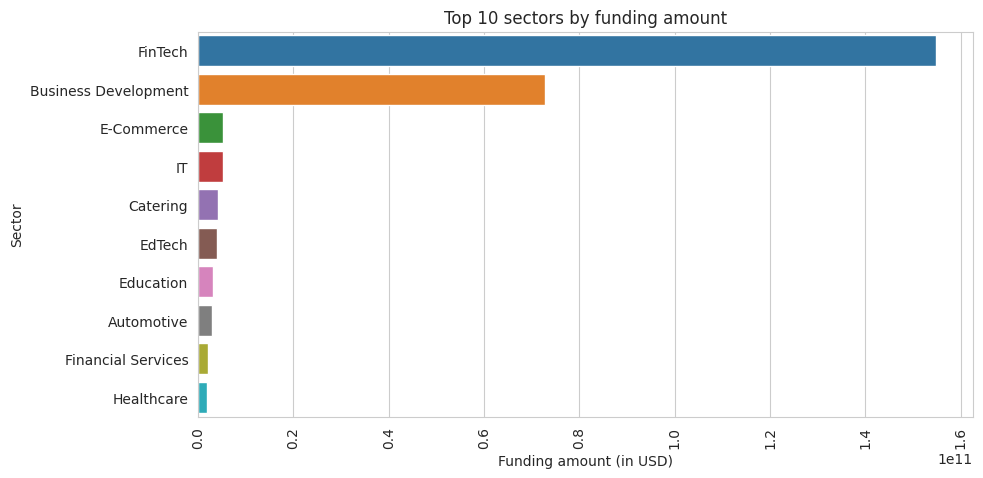

In [252]:
# Create a bar chart using seaborn

figure = plt.figure(figsize = (10, 5))

sns.barplot(y=top_sectors['Sector'], x=top_sectors['Amount'], data=top_sectors)
plt.xticks(rotation=90)
plt.title("Top 10 sectors by funding amount")
plt.ylabel("Sector")
plt.xlabel("Funding amount (in USD)")
plt.show()

### Fintech and Business Development received the majority of the funding 

# Question 2
## Which stages do start-ups receive the most funding?

In [253]:
# Creating a dataframe of top stage
top_Stage = df.groupby("Stage")["Amount($)"].sum().sort_values(ascending=False).head(10)
top_Stage =pd.DataFrame(top_Stage).reset_index()
top_Stage.columns =['Stage', 'Amount'] 
top_Stage1 = top_Stage.loc[top_Stage['Stage'] != 'Debt']
top_Stage1 = top_Stage1.loc[top_Stage['Stage'] != 'Undisclosed']


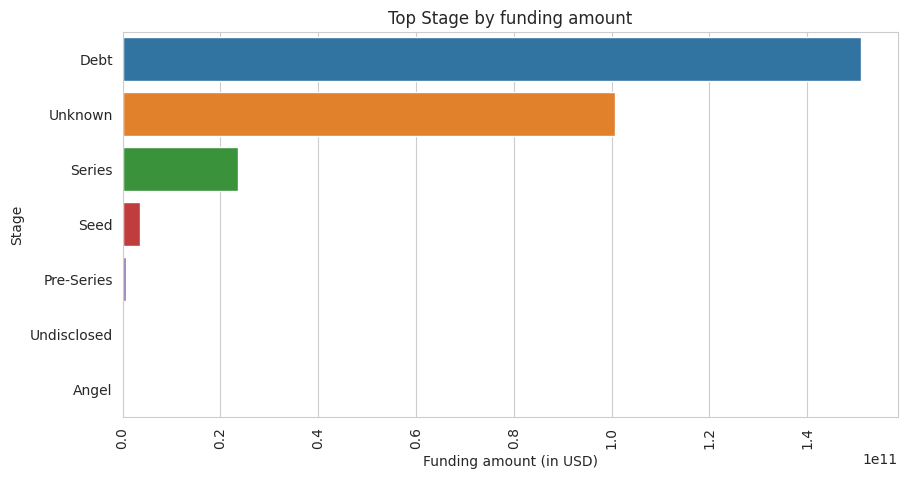

In [254]:
# Create a bar chart using seaborn

figure = plt.figure(figsize = (10, 5))

sns.barplot(y=top_Stage['Stage'], x=top_Stage['Amount'], data=top_Stage)
plt.xticks(rotation=90)
plt.title("Top Stage by funding amount")
plt.ylabel("Stage")
plt.xlabel("Funding amount (in USD)")
plt.show()

#### Most of the companies received their funds as debt while some companies funding stage remains unkown

# Question 3
## What is the distribution of funding amounts among start-ups?

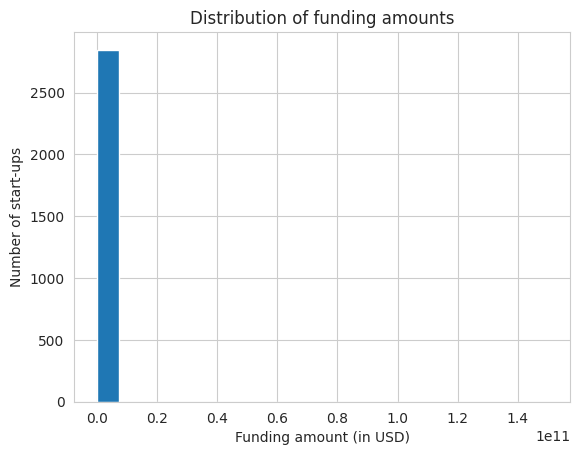

In [255]:
plt.hist(df["Amount($)"], bins=20)
plt.title("Distribution of funding amounts")
plt.xlabel("Funding amount (in USD)")
plt.ylabel("Number of start-ups")
plt.show()

In [256]:
df["Amount($)"].describe()

count    2.849000e+03
mean     9.827270e+07
std      3.101804e+09
min      0.000000e+00
25%      6.500000e+05
50%      2.500000e+06
75%      7.500000e+06
max      1.500000e+11
Name: Amount($), dtype: float64

#### The highest amount received was a one hundred and fifty billiion dollars with the average amount being three million dollars. 

#### Also considering the case where each start-up received some amount of money ie no start-up received zero dollars

In [257]:
df_0 = df.loc[df['Amount($)'] != 0]
#df_0.head()

In [258]:

#plt.hist(df_0["Amount($)"], bins=20)
#plt.title("Distribution of funding amounts")
#plt.xlabel("Funding amount (in USD)")
#plt.ylabel("Number of start-ups")
#plt.show()

In [259]:
#df_0["Amount($)"].describe()

#### The highest amount received was a one hundred and fifty billiion dollars with the average amount being more than a million dollars still remains. Start-ups can expect to receive a minimun amount more than nine hundred thousand dollars

# Question 4
## Which cities have the highest concentration of start-ups?

In [260]:
top_cities = df["City"].value_counts().sort_values(ascending=False).head(10)
top_cities =pd.DataFrame(top_cities).reset_index()
top_cities.columns =['City', 'Count']

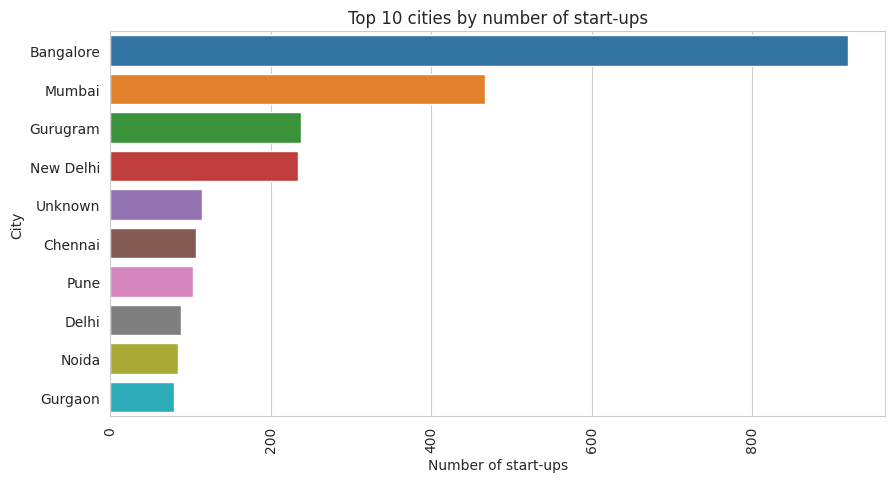

In [261]:
figure = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(y=top_cities['City'], x=top_cities['Count'], data=top_cities)

plt.xticks(rotation=90)
plt.title("Top 10 cities by number of start-ups")
plt.ylabel("City")
plt.xlabel("Number of start-ups")
plt.show()

#### Bangalore and Mumbai account for more than 50% of all the start-up. This make them the best city.

# Question 5
## How has the number of start-ups and funding amounts changed over time?

In [262]:
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df_1 = df.set_index("Year")
#df_1.head()

In [263]:
startups_by_year = df_1.resample("Y").size()
#startups_by_year

In [264]:
startups_by_year =pd.DataFrame(startups_by_year).reset_index()
startups_by_year.columns =['Year', 'Count']
#startups_by_year

In [265]:
funding_by_year = df_1.resample("Y")["Amount($)"].sum()
#funding_by_year

In [266]:
funding_by_year =pd.DataFrame(funding_by_year).reset_index()
funding_by_year.columns =['Year', 'Count']
#funding_by_year

In [267]:
# Joining two DataFrames
year_df = (pd.merge(funding_by_year,startups_by_year, left_on='Year', right_on='Year', how='left'))
year_df.rename(columns = {'Count_x':'funding_by_year', 'Count_y':'startups_by_year'}, inplace = True)
year_df

,Year,funding_by_year,startups_by_year
0,2018-12-31,5.612105e+09,525
1,2019-12-31,3.336433e+09,89
2,2020-12-31,9.162556e+10,1048
3,2021-12-31,1.794048e+11,1187


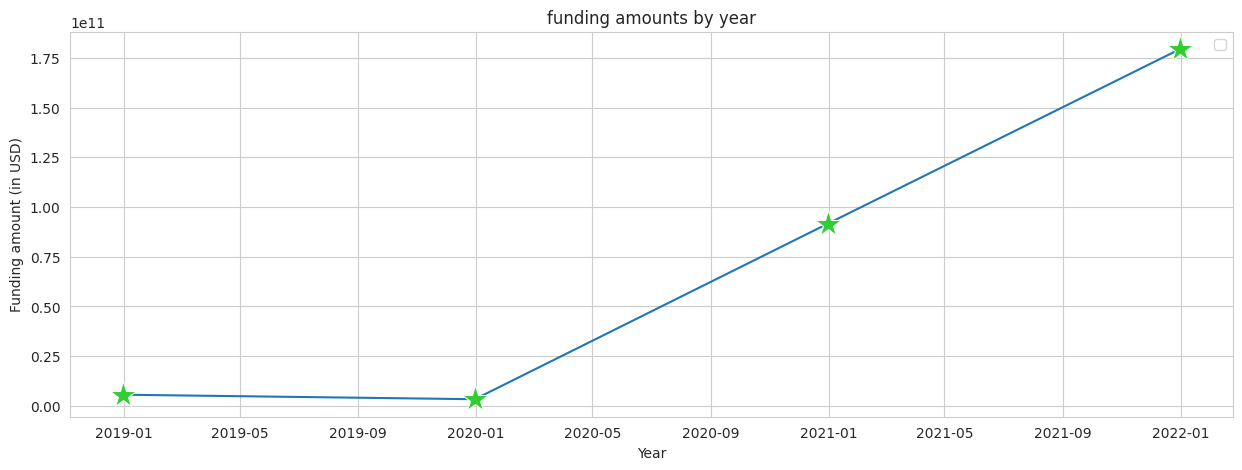

In [268]:
# Plot the first line plot on the first subplot
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(x='Year', y='funding_by_year', data=year_df, marker='*', markerfacecolor='limegreen', markersize=20)

plt.legend()
plt.title("funding amounts by year")
plt.xlabel("Year")
plt.ylabel("Funding amount (in USD)")
plt.show()

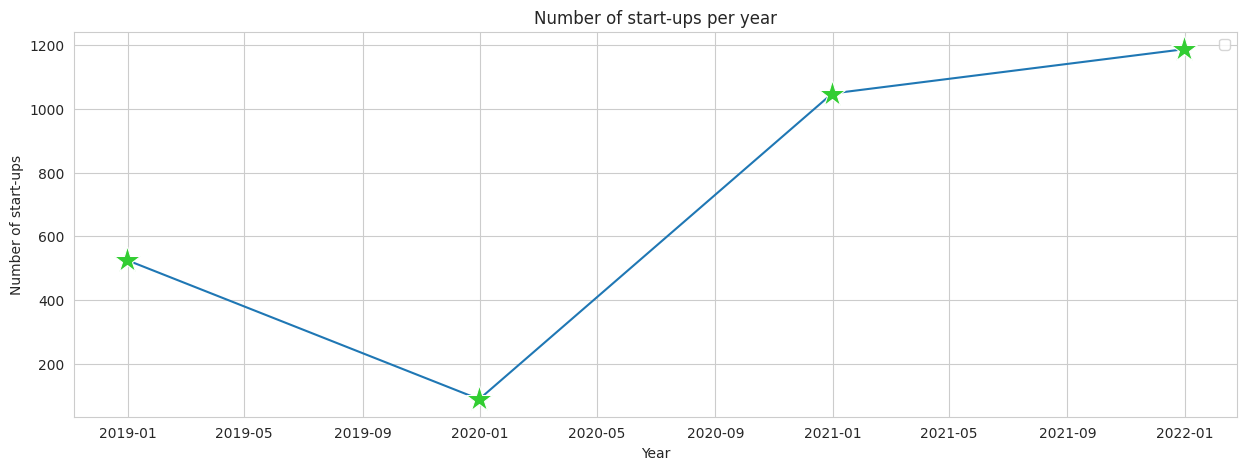

In [269]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(x='Year', y='startups_by_year', data=year_df, marker='*', markerfacecolor='limegreen', markersize=20)
plt.legend()
plt.title("Number of start-ups per year")
plt.xlabel("Year")
plt.ylabel("Number of start-ups")
plt.show()

#### The amount of funds received by startups in India remained almost constant from 2019 to 2020 but increased from 2020 to 2021. 
### Also, the number of startups in India fell from 2019 to 2020 the reason may be due to the outbreak of covid-19 in late 2019, however it increased steeply from 2020 to 2021.

# Question 6
## How does the funding amount correlate with the start-up stage?

In [270]:
df["Stage"].unique()

array(['Unknown', 'Seed', 'Pre-Series', 'Series', 'Debt', 'Angel',
       'Undisclosed'], dtype=object)

In [271]:
# Encode column1 as dummy variables
encoded_df = pd.get_dummies(df["Stage"])

# Add the numeric column to the encoded DataFrame
encoded_df["Amount($)"] = df["Amount($)"]

<Axes: >

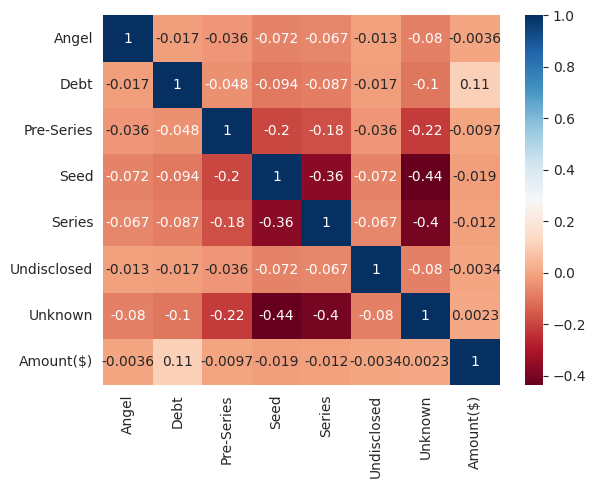

In [272]:
# Calculate the correlation coefficient between funding_amount and startup_stage
correlation_coefficient = encoded_df.corr()

#print('Correlation coefficient:', correlation_coefficient)

sns.heatmap(correlation_coefficient, annot=True, cmap='RdBu')

##### **Positive Correlation:** Amount has a positive correlation with Debt and unknown at 0.172495 and 0.002220 respectively. This means as the amount is increasing Debt and unknown are increasing too and vice versa is also true.
##### **Negative Correlation:** Amount has a negative correlation with Pre-Series, Seed, Series, and Undisclosed at -0.009772, -0.020037, -0.012237, and -0.003300 respectively. This show that as the amount increases the following are decreasing.
##### Correlation is not causation is a key point, therefore we cannot assume these patterns are a result of amount. The cause must be investigated

# **Hypothesis**

#### H0: There is no significant difference in funding amounts between technology start-ups and non-technology start-ups.   
#### H1: Technology start-ups receive more funding than non-technology start-ups.

In [273]:
# Separate the data into technology and non-technology start-ups
tech_funding = df[df["Sector Category"] == "Tech"]["Amount($)"]
non_tech_funding = df[df["Sector Category"] != "Tech"]["Amount($)"]

In [274]:
# Calculate the mean funding amounts for each group
tech_mean = tech_funding.mean()
non_tech_mean = non_tech_funding.mean()

In [275]:
# Perform the two-sample t-test
t_stat, p_val = stats.ttest_ind(tech_funding, non_tech_funding, equal_var=False)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: Technology start-ups receive more funding than non-technology start-ups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in funding amounts between technology start-ups and non-technology start-ups.")


# Print the results

print('Technology Mean:', tech_mean)

print('Non-Technology Mean:', non_tech_mean)

print('T-Statistic:', t_stat)

print('P-Value:', p_val)

Fail to reject null hypothesis: There is no significant difference in funding amounts between technology start-ups and non-technology start-ups.
Technology Mean: 144697193.7924738
Non-Technology Mean: 63703086.66246732
T-Statistic: 0.6200496654762777
P-Value: 0.5353186259946044


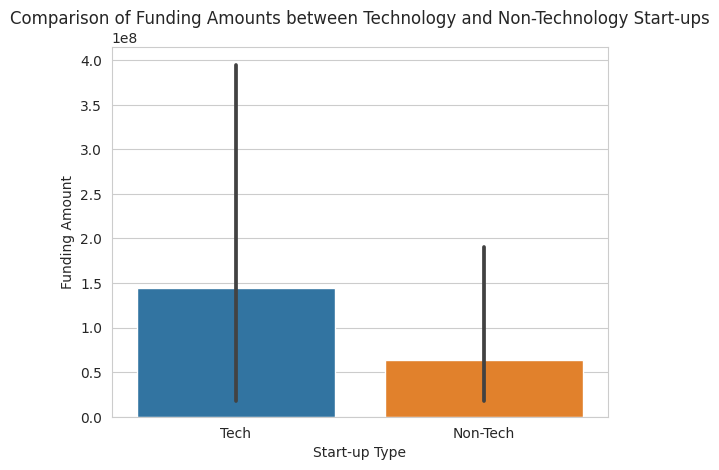

In [276]:
# Create a bar plot using Seaborn
sns.barplot(x="Sector Category", y='Amount($)', data=df)

# Add labels and a title
plt.xlabel('Start-up Type')
plt.ylabel('Funding Amount')
plt.title('Comparison of Funding Amounts between Technology and Non-Technology Start-ups')

# Display the plot
plt.show()
